# Healthcare Financing and Expenditure in Eastern Africa

## 1. BUSINESS UNDERSTANDING   
Eastern Africa, encompassing nations such as Djibouti, Eritrea, Ethiopia, Kenya, and others, faces unique healthcare challenges rooted in diverse economic, political, and infrastructural landscapes. A significant concern is the socioeconomic inequalities leading to disparities in healthcare access and affordability. The region witnesses a high dependency on out-of-pocket (OOP) payments, which can deter individuals from availing medical services and potentially push them into poverty. Alarmingly, Africa's OOP health expenses are considerably higher than other continents.

Government health spending in these countries is relatively low, with government sources contributing less than 30% of total health expenditure in low-income countries. This contrasts with high-income countries where government contributions hover around 80%. The recent economic challenges due to the COVID-19 pandemic have further strained the healthcare financing system. Innovative financing strategies are urgently needed to strengthen health systems and ensure equitable healthcare access for all.

Understanding healthcare financing is crucial as it provides insights into a country's economic priorities. The proportion of GDP allocated to health indicates a nation's emphasis on healthcare. High personal healthcare costs can deter individuals from accessing medical services, leading to untreated illnesses and potential outbreaks. A significant portion of health expenditure from external sources might indicate a country's dependency on foreign aid, raising sustainability concerns. Analyzing the balance between government and private healthcare spending offers valuable insights into the roles of both sectors, aiding in policy decisions and fostering collaborations.   

### 1.1 Research Questions
- What is the current landscape of healthcare financing and expenditure in Eastern Africa?
- Are there any key trends, challenges, and opportunities in healthcare financing?
- What percentage of GDP do governments allocate to health expenditure?
- What fraction of Eastern African countries' general health expenditure can be attributed to out of pocket expenditure?

### 1.2 Problem Statement 
Can we utilize historical data on healthcare financing and expenditure in Eastern Africa to create a predictive model that accurately forecasts future healthcare expenditure trends?   ### 1.3 Objectives

#### 1.3.1 Main Objective
Analyze healthcare financing and expenditure trends in Eastern Africa to construct a model predicting future healthcare expenditure percentage changes.

#### 1.3.2 Specific Objectives
- Explore World Bank data, identifying relevant health system indicators for Eastern Africa.
- Analyze healthcare expenditure, distinguishing between public and private spending.
- Discover correlations between healthcare financing indicators to reveal patterns or relationships.
- Offer recommendations for governments, suggesting areas of improvement, potential collaborations, and strategies to enhance healthcare financing.

### 1.4 Success Metric
Achieve a low root mean square error 

### 1.5 Stakeholders

- Government Finance Ministries: 
Allocate healthcare budgets based on past trends and future predictions, ensuring healthcare remains accessible and affordable.
- Healthcare Startups: 
Launch innovative financing solutions or health tech services based on regions with the highest private expenditure.
- International Donors and NGOs: 
Allocate aid efficiently and effectively, targeting regions with the most significant needs.

## 3. DATA UNDERSTANDING

For our project we decided to focus on health development indicators specifically on the topic of `Health Systems`. Here are the indicators and their descriptions:


- **Current health expenditure (% of GDP)**: Represents the total health expenditure as a percentage of the Gross Domestic Product (GDP). It indicates the priority given to health in the national budget.

- **External health expenditure (% of current health expenditure)**: Indicates the percentage of health expenditure that comes from external sources, such as foreign aid or grants.

- **Domestic general government health expenditure (% of current health expenditure)**: Indicates the percentage of health expenditure that is funded by the domestic government.

- **Domestic general government health expenditure (% of GDP)**: Represents the government health expenditure as a percentage of GDP.

- **Domestic general government health expenditure (% of general government expenditure)**: Measures the health expenditure as a percentage of the total government expenditure.

- **Out-of-pocket expenditure (% of current health expenditure)**: Measures the percentage of health expenditure that is paid directly by individuals, without insurance or reimbursement.

- **Domestic private health expenditure (% of current health expenditure)**: Measures the percentage of health expenditure that is funded by private domestic sources, such as private insurance or businesses.

### 3.1 Importing Libraries

In [45]:
#Importing necessary libraries
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, GRU, Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.graph_objects as go
import re
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

### 3.2 Loading the data

In [3]:
# Loading dataframe
wdi_df = pd.read_csv("data/WDIData.csv")

# Viewing the first five rows
wdi_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


In [4]:
# Loading the WDI series csv file.
series_df = pd.read_csv("data/WDISeries.csv")
series_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,The world and regional aggregate series do not...,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,The world and regional aggregate series do not...,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,Areas of former states are included in the suc...,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,Areas of former states are included in the suc...,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


**Just an overall view of the datasets shows there are a lot of missing values which we are going to have to deal with.**

## 4. DATA PREPARATION

In [5]:
# Dropping unnecessary columns
wdi_df.drop('Unnamed: 67', axis=1, inplace=True)

Dataframe was converted from wide format to long format using pd.melt making the data easier to analyse and manipulate.

In [6]:
# Highlighting the column names
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

# Using pd.melt to make the years into one column
wdi_melt = pd.melt(wdi_df, 
                   id_vars=id_vars, 
                   var_name='Years', 
                   value_name='Score')

# Loading first five rows
wdi_melt.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Years,Score
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,1960,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,1960,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


The decision was made to exclusively utilise health development indicators from Eastern Africa countries.

In [7]:
# Isolating Eastern Africa countries
eastern_countries = [
"Djibouti",
"Eritrea",
"Ethiopia",
"Kenya",
"Rwanda",
"Sudan",
"Tanzania",
"Uganda"]

# Creating new dataframe focusing on Eastern Africa countries
eastern_df = wdi_melt[wdi_melt['Country Name'].isin(eastern_countries)]

# Loading the new dataframe
eastern_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Years,Score
152131,Djibouti,DJI,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
152132,Djibouti,DJI,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,1960,NaN
152133,Djibouti,DJI,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,1960,NaN
152134,Djibouti,DJI,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
152135,Djibouti,DJI,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


In [8]:
eastern_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744408 entries, 152131 to 24730887
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    744408 non-null  object 
 1   Country Code    744408 non-null  object 
 2   Indicator Name  744408 non-null  object 
 3   Indicator Code  744408 non-null  object 
 4   Years           744408 non-null  object 
 5   Score           279010 non-null  float64
dtypes: float64(1), object(5)
memory usage: 39.8+ MB


In [9]:
# Years used.
eastern_df = eastern_df[(eastern_df['Years'] >= '2010') & (eastern_df['Years'] <= '2020')]

The decision was made to utilise development indicators from Eastern Africa countries, specifically selecting indicators from a span of 10 years and including a total of 8 countries.

In [10]:
# Specifies the indicators
expenditure = [i for i in eastern_df['Indicator Name'] if 'expenditure' in i]
expenditure_df = eastern_df[eastern_df['Indicator Name'].isin(expenditure)]

# Prints overall information of the dataset
expenditure_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7480 entries, 19796267 to 23944858
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7480 non-null   object 
 1   Country Code    7480 non-null   object 
 2   Indicator Name  7480 non-null   object 
 3   Indicator Code  7480 non-null   object 
 4   Years           7480 non-null   object 
 5   Score           5057 non-null   float64
dtypes: float64(1), object(5)
memory usage: 409.1+ KB


In [11]:
# Merges expenditure_df and series_df
merged_df = pd.merge(expenditure_df, 
                     series_df,
                     left_on="Indicator Code",
                     right_on="Series Code",
                     how='left')

# Prints first five rows
merged_df.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code,Years,Score,Series Code,Topic,Indicator Name_y,Short definition,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,Djibouti,DJI,Adjusted savings: education expenditure (% of ...,NY.ADJ.AEDU.GN.ZS,2010,7.802883e+00,NY.ADJ.AEDU.GN.ZS,Economic Policy & Debt: National accounts: Adj...,Adjusted savings: education expenditure (% of ...,NaN,...,NaN,NaN,World Bank staff estimates using data from the...,NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
1,Djibouti,DJI,Adjusted savings: education expenditure (curre...,NY.ADJ.AEDU.CD,2010,8.941872e+07,NY.ADJ.AEDU.CD,Economic Policy & Debt: National accounts: Adj...,Adjusted savings: education expenditure (curre...,NaN,...,NaN,NaN,World Bank staff estimates using data from the...,NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
2,Djibouti,DJI,"Current education expenditure, primary (% of t...",SE.XPD.CPRM.ZS,2010,NaN,SE.XPD.CPRM.ZS,Education: Inputs,"Current education expenditure, primary (% of t...",NaN,...,NaN,NaN,UNESCO Institute for Statistics (UIS). UIS.Sta...,"Current expenditure, primary is calculated by ...",NaN,NaN,NaN,NaN,CC BY-4.0,NaN
3,Djibouti,DJI,"Current education expenditure, secondary (% of...",SE.XPD.CSEC.ZS,2010,NaN,SE.XPD.CSEC.ZS,Education: Inputs,"Current education expenditure, secondary (% of...",NaN,...,NaN,NaN,UNESCO Institute for Statistics (UIS). UIS.Sta...,"Current expenditure, secondary is calculated b...",NaN,NaN,NaN,NaN,CC BY-4.0,NaN
4,Djibouti,DJI,"Current education expenditure, tertiary (% of ...",SE.XPD.CTER.ZS,2010,NaN,SE.XPD.CTER.ZS,Education: Inputs,"Current education expenditure, tertiary (% of ...",NaN,...,NaN,NaN,UNESCO Institute for Statistics (UIS). UIS.Sta...,"Current expenditure, tertiary is calculated by...",NaN,NaN,NaN,NaN,CC BY-4.0,NaN


In [12]:
# Identifies necessary columns in the merged dataset
neccessary_columns = ['Country Name', 'Indicator Name_x', 'Topic', 'Years', 'Score']

# Dataframe with necessary columns
merged_df = merged_df[neccessary_columns]

# Prints overall info of the dataset.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7480 entries, 0 to 7479
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      7480 non-null   object 
 1   Indicator Name_x  7480 non-null   object 
 2   Topic             7480 non-null   object 
 3   Years             7480 non-null   object 
 4   Score             5057 non-null   float64
dtypes: float64(1), object(4)
memory usage: 292.3+ KB


The indicators partaining human resource and expenditure were under the same topic `Health Systems`, so the indicators were segregated and exclusive focus was placed on analysing the expenditure of health systems, in accordance to our business understanding.

In [13]:
# Isolates necessary indicators
indicators = ['Current health expenditure (% of GDP)',
'Domestic general government health expenditure (% of current health expenditure)',
'Domestic general government health expenditure (% of GDP)',
'Domestic general government health expenditure (% of general government expenditure)',
'Domestic private health expenditure (% of current health expenditure)',
'External health expenditure (% of current health expenditure)',
'Out-of-pocket expenditure (% of current health expenditure)']

# Dataframe with necessary columns
health_df = merged_df[merged_df['Indicator Name_x'].isin(indicators)]

# Prints first five rows
health_df.head()

,Country Name,Indicator Name_x,Topic,Years,Score
6,Djibouti,Current health expenditure (% of GDP),Health: Health systems,2010,3.061504
11,Djibouti,Domestic general government health expenditure...,Health: Health systems,2010,60.679157
12,Djibouti,Domestic general government health expenditure...,Health: Health systems,2010,1.857695
13,Djibouti,Domestic general government health expenditure...,Health: Health systems,2010,6.970487
16,Djibouti,Domestic private health expenditure (% of curr...,Health: Health systems,2010,29.537765


In [14]:
# Converts years column to datetime object
health_df['Years'] = pd.to_datetime(health_df['Years'])

# Makes years column index of dataframe
health_df.set_index('Years', inplace=True)

# Prints last 5 rows.
health_df.tail()

,Country Name,Indicator Name_x,Topic,Score
Years,,,,
2020-01-01,Uganda,Domestic general government health expenditure...,Health: Health systems,0.672564
2020-01-01,Uganda,Domestic general government health expenditure...,Health: Health systems,3.138830
2020-01-01,Uganda,Domestic private health expenditure (% of curr...,Health: Health systems,41.942467
2020-01-01,Uganda,External health expenditure (% of current heal...,Health: Health systems,41.082459
2020-01-01,Uganda,Out-of-pocket expenditure (% of current health...,Health: Health systems,37.445602


In [15]:
# Renaming columns
health_df.rename(columns={
    'Country Name': 'Country',
    'Indicator Name_x': 'Indicator Name',
    'Score' : 'Percentage'
}, inplace=True)

# Prints the first five rows
health_df.head()

,Country,Indicator Name,Topic,Percentage
Years,,,,
2010-01-01,Djibouti,Current health expenditure (% of GDP),Health: Health systems,3.061504
2010-01-01,Djibouti,Domestic general government health expenditure...,Health: Health systems,60.679157
2010-01-01,Djibouti,Domestic general government health expenditure...,Health: Health systems,1.857695
2010-01-01,Djibouti,Domestic general government health expenditure...,Health: Health systems,6.970487
2010-01-01,Djibouti,Domestic private health expenditure (% of curr...,Health: Health systems,29.537765


In [16]:
health_df[health_df.duplicated()]

,Country,Indicator Name,Topic,Percentage
Years,,,,
2011-01-01,Eritrea,Domestic general government health expenditure...,Health: Health systems,2.354107
2012-01-01,Eritrea,Domestic general government health expenditure...,Health: Health systems,2.354107
2013-01-01,Eritrea,Domestic general government health expenditure...,Health: Health systems,2.354107
2014-01-01,Eritrea,Domestic general government health expenditure...,Health: Health systems,2.354107
2015-01-01,Eritrea,Domestic general government health expenditure...,Health: Health systems,2.354107
2016-01-01,Djibouti,Domestic general government health expenditure...,Health: Health systems,4.069510
2016-01-01,Eritrea,Domestic general government health expenditure...,Health: Health systems,2.354107
2017-01-01,Djibouti,Domestic general government health expenditure...,Health: Health systems,4.069510
2017-01-01,Eritrea,Domestic general government health expenditure...,Health: Health systems,2.354107


Due to nature of the data and the context of the duplicates, the duplicates were not dropped.

In [17]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 616 entries, 2010-01-01 to 2020-01-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         616 non-null    object 
 1   Indicator Name  616 non-null    object 
 2   Topic           616 non-null    object 
 3   Percentage      616 non-null    float64
dtypes: float64(1), object(3)
memory usage: 24.1+ KB


In the final dataframe after preprocessing which includes tasks such as dealing with duplicates and missing values, the final dataframe now contains `616` rows and `4` columns. There has also been some changing of column names and the `Year` column was converted to datetime format in order to conduct time series analysis on the dataframe.

On to the next section which is now Exploratory Data Analysis.


## 5. EXPLORATORY DATA ANALYSIS

## 

### 5.1 Bivariate Analysis.

In [18]:
# Seperates the dataframe into specific indicators
def create_dfs(df):
    indicators = [i for i in df['Indicator Name'].unique()]
    dfs = {}
    for i in indicators:
        dfs[i] = df[df['Indicator Name'] == i]
    return dfs

# Seperates the dataframe which is seperated by different indicators into now seperate countries.
def create_country_dfs(df, periods=1):
    countries = [country for country in df['Country'].unique()]
    indicator_dfs = create_dfs(df) 
    country_dfs = {}
    
    for c in countries:
        country_dfs[c] = {} 
        for indicator, indicator_df in indicator_dfs.items():
            country_df = indicator_df[indicator_df['Country'] == c]
            country_df['Percentage Diff'] = country_df['Percentage'].diff(periods=periods)
            country_df['Percentage Diff'] = country_df['Percentage Diff'].fillna(0)
            country_dfs[c][indicator] = country_df
            
    return country_dfs

In [19]:
# Seperates dataframe seperated into different indicators into specific countries
countries = create_country_dfs(health_df)

# Seperates dataframe into specific indicators.
indicators = create_dfs(health_df)

In [20]:
# pip install nbformat>=4.2.0

In [21]:
def plotly_plot(df, fig, row, col, indicator, country):
    trace = go.Scatter(x=df.index, y=df['Percentage'], mode='lines+markers', name=indicator)
    fig.add_trace(trace, row=row, col=col)
    fig.update_xaxes(title_text="Year", row=row, col=col)
    fig.update_yaxes(title_text="Percentage(%)", row=row, col=col)
    fig.update_layout(title_text=f"{country}", showlegend=False)

# Assuming create_country_dfs function is defined elsewhere and health_df is available
country_dfs = create_country_dfs(health_df)

# Iterate over the indicators and plot the data for each country
for indicator in health_df['Indicator Name'].unique():
    # Create a subplot figure
    fig = make_subplots(rows=4, cols=2, subplot_titles=[country for country in country_dfs.keys()])

    # Iterate over the subplots and plot the data for each country
    for i, (country, country_data) in enumerate(country_dfs.items()):
        row = (i // 2) + 1
        col = (i % 2) + 1

        if indicator in country_data:
            plotly_plot(country_data[indicator], fig, row, col, indicator, country)

    # Update layout and show the plot
    fig.update_layout(title_text=f"{indicator}", height=800, width=1000)
    fig.show()


**According to the plots visible above, there is trend in the data given. However, in the `Domestic general government health expenditure (% of general government expenditure)` indicator Eritrea seems to have no trend. It was difficult to look for seasonality in the data since the data is in years format not months, day or even hours.**

### 5.2 Time Series Decomposition

In [22]:
# Checks for stationarity
def adf_test_indicator(df, country):
    country_df = df[df['Country'] == country]
    indicator_results = {}
    
    unique_indicators = country_df['Indicator Name'].unique()
    for indicator in unique_indicators:
        indicator_data = country_df[country_df['Indicator Name'] == indicator]['Percentage']
        
        # Check if the data is constant
        if indicator_data.var() == 0:
            continue  # Skip the Dickey-Fuller test
        
        # Perform the Dickey-Fuller test
        result = adfuller(indicator_data)
        
        # Store the result in the dictionary
        indicator_results[indicator] = {
            'ADF Statistic': result[0],
            'P-value': result[1],
            'Critical Values': result[4]
        }
    
    return indicator_results


In [23]:
# List of countries for analysis
countries = ['Tanzania', 'Kenya', 'Uganda', 'Rwanda', 'Ethiopia', 'Sudan']

# Initialize an empty dictionary to store results
results = {}

# Iterate through each country in the list
for country in countries:
    # Call the function adf_test_indicator to perform an Augmented Dickey-Fuller test
    country_results = adf_test_indicator(health_df, country)
    
    # Store the results in the 'results' dictionary with the country name as the key
    results[country] = list(country_results.items())

# Print the stationarity results for all countries
for country, country_results in results.items():
    print(f"Indicators in {country} and stationarity:")
    
    # Iterate through the indicators and their ADF test results
    for indicator, result in country_results:
        print(f"{indicator}:")
        
        # Check if the ADF Statistic is less than the critical value at 1% significance level
        # and if the P-value is less than 0.05, indicating stationarity
        if result['ADF Statistic'] < result['Critical Values']['1%'] and result['P-value'] < 0.05:
            print("Stationary")
        else:
            print("Not Stationary")
        print()


Indicators in Tanzania and stationarity:
Current health expenditure (% of GDP):
Not Stationary

Domestic general government health expenditure (% of current health expenditure):
Not Stationary

Domestic general government health expenditure (% of GDP):
Not Stationary

Domestic general government health expenditure (% of general government expenditure):
Not Stationary

Domestic private health expenditure (% of current health expenditure):
Not Stationary

External health expenditure (% of current health expenditure):
Not Stationary

Out-of-pocket expenditure (% of current health expenditure):
Not Stationary

Indicators in Kenya and stationarity:
Current health expenditure (% of GDP):
Not Stationary

Domestic general government health expenditure (% of current health expenditure):
Not Stationary

Domestic general government health expenditure (% of GDP):
Not Stationary

Domestic general government health expenditure (% of general government expenditure):
Not Stationary

Domestic private h

It's essential to transform it into a stationary form before applying time series models effectively. It leads to more accurate and reliable forecasting, simplifies the modeling process, and helps identify patterns and relationships in the data. The code above proves that for each indicator in each country, there was no stationarity. This can be further proved in the visualisations drawn by the `plot` function.

The non-stationarity was dealt with in the modelling section and the data was also checked for seasonality.

## 6. MODELLING

### 6.1 Splitting into train and test dataset

In [24]:
# Splitting the data
train_ratio = 0.6  # Specify the ratio of training data
split_index = int(len(health_df) * train_ratio)  # Calculate the index to split the data

# Seperates data into train and test according to the split_index
train_data = health_df[:split_index]
test_data = health_df[split_index:]

### 6.2 Differencing the data

This is to remove non-stationarity, which focuses on eliminating trends in the time series data.

In [25]:
# Splits input data indicators by country
def split_data(country, periods=1):
    differenced_test_data = create_country_dfs(test_data, periods=periods)[country]
    differenced_train_data = create_country_dfs(train_data, periods=periods)[country]
    return differenced_test_data,differenced_train_data


### 6.3 Checking for Seasonality

### 6.2.2 Plotting Auto-Correlation Function (ACF)

- Auto-correlation function measures the correlation between time series data and its lagged values, enables understanding the presence of correlation, seasonality and patterns in time series.

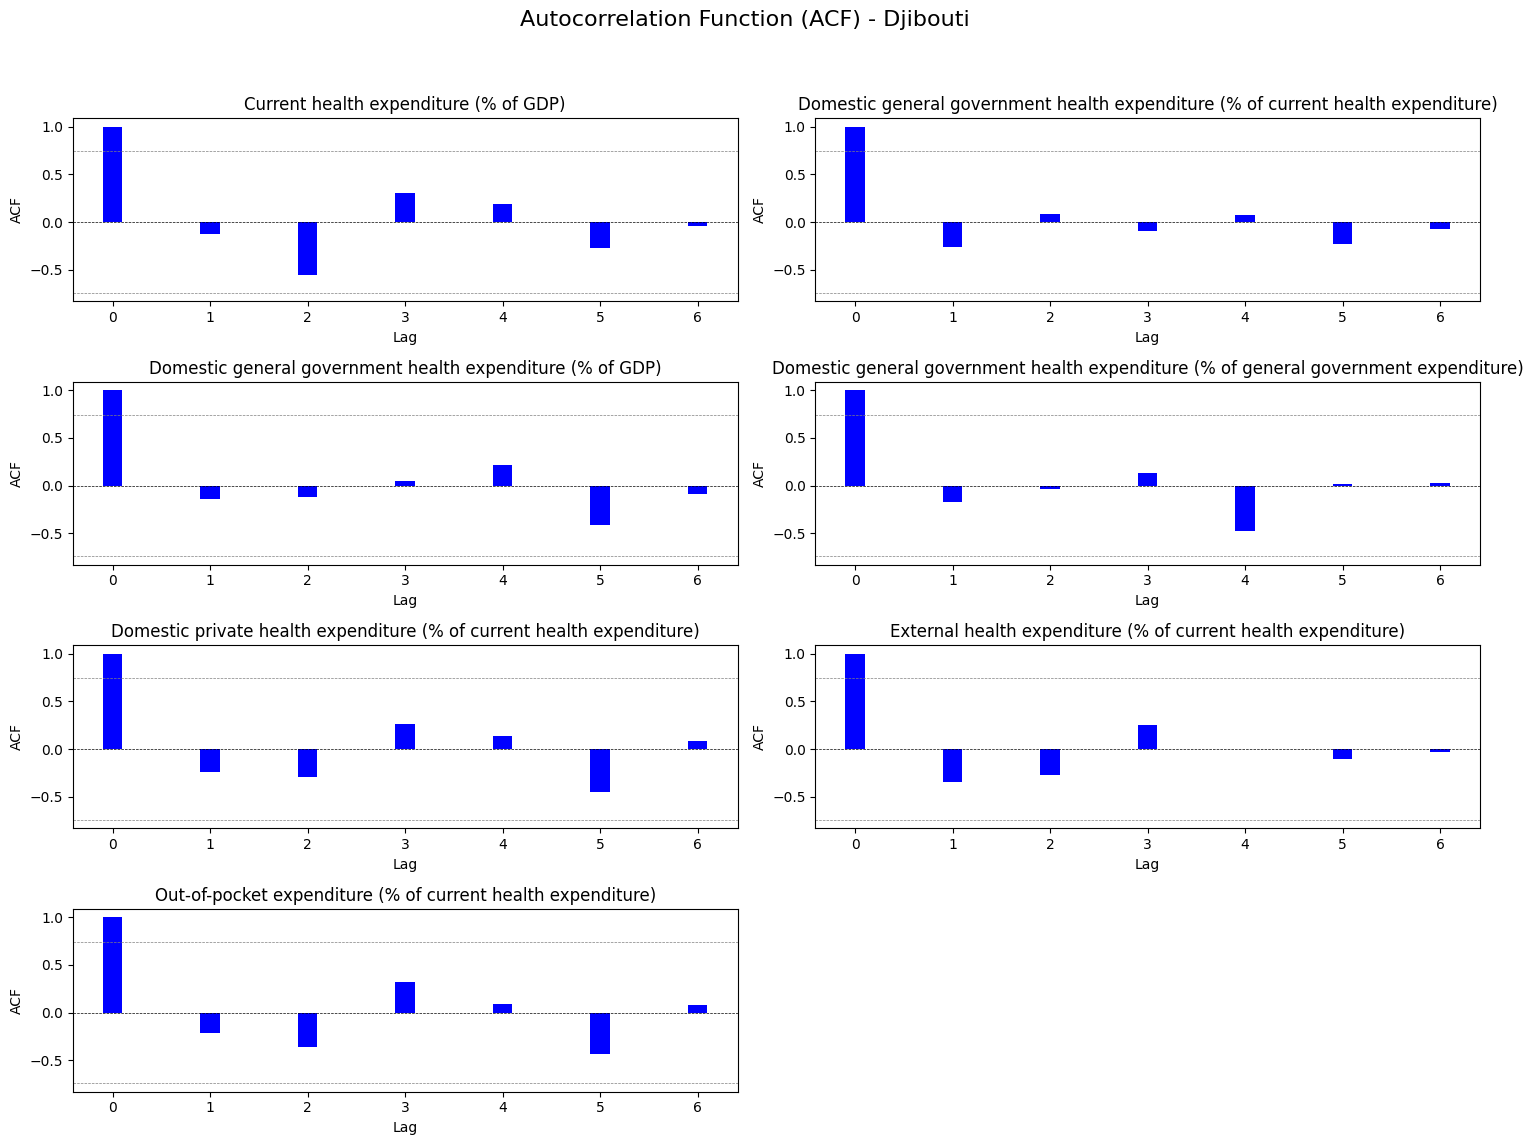

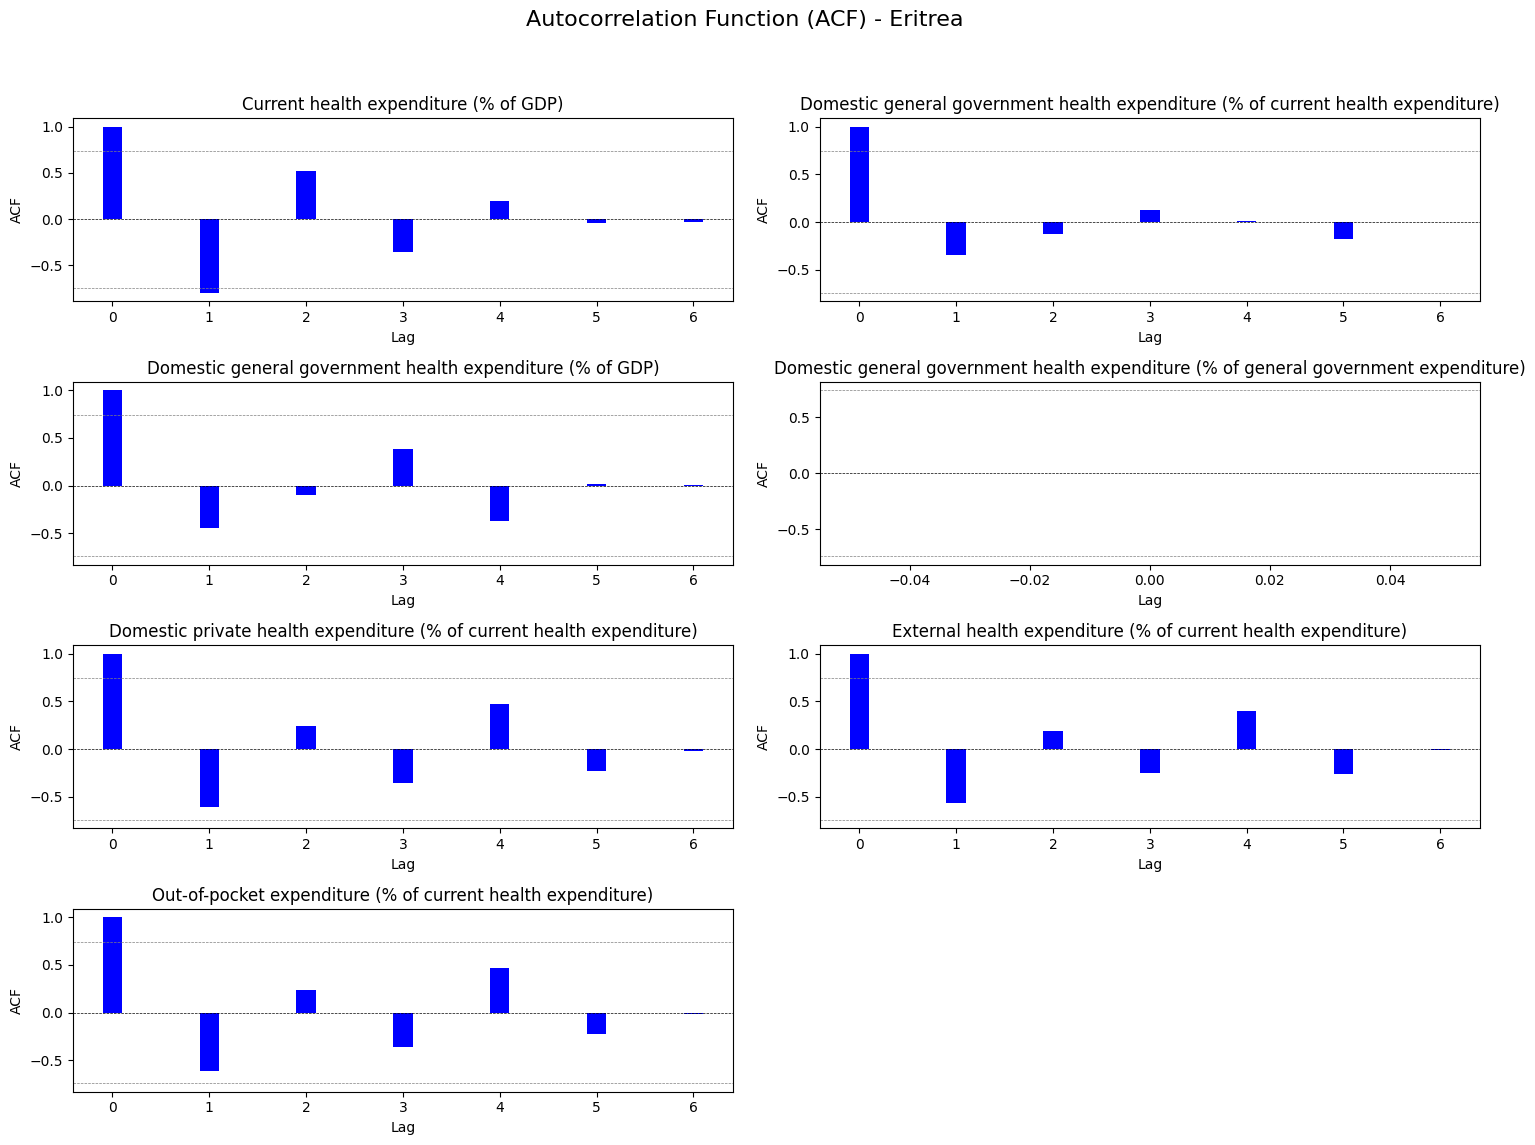

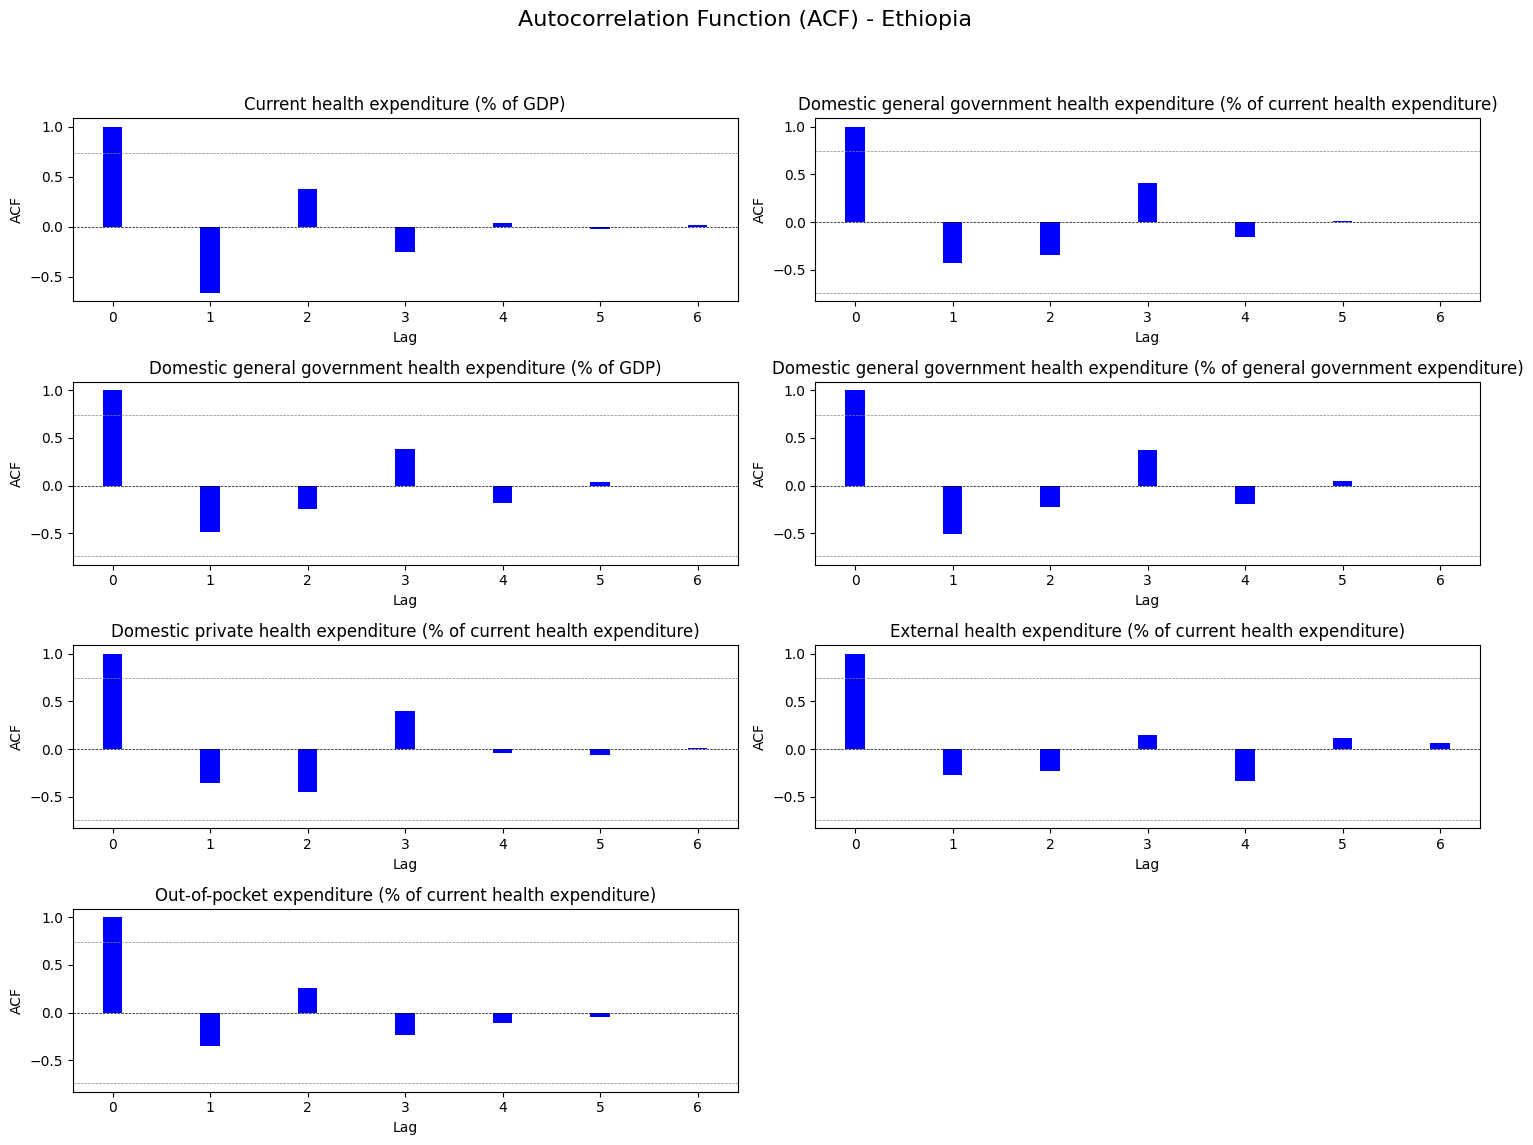

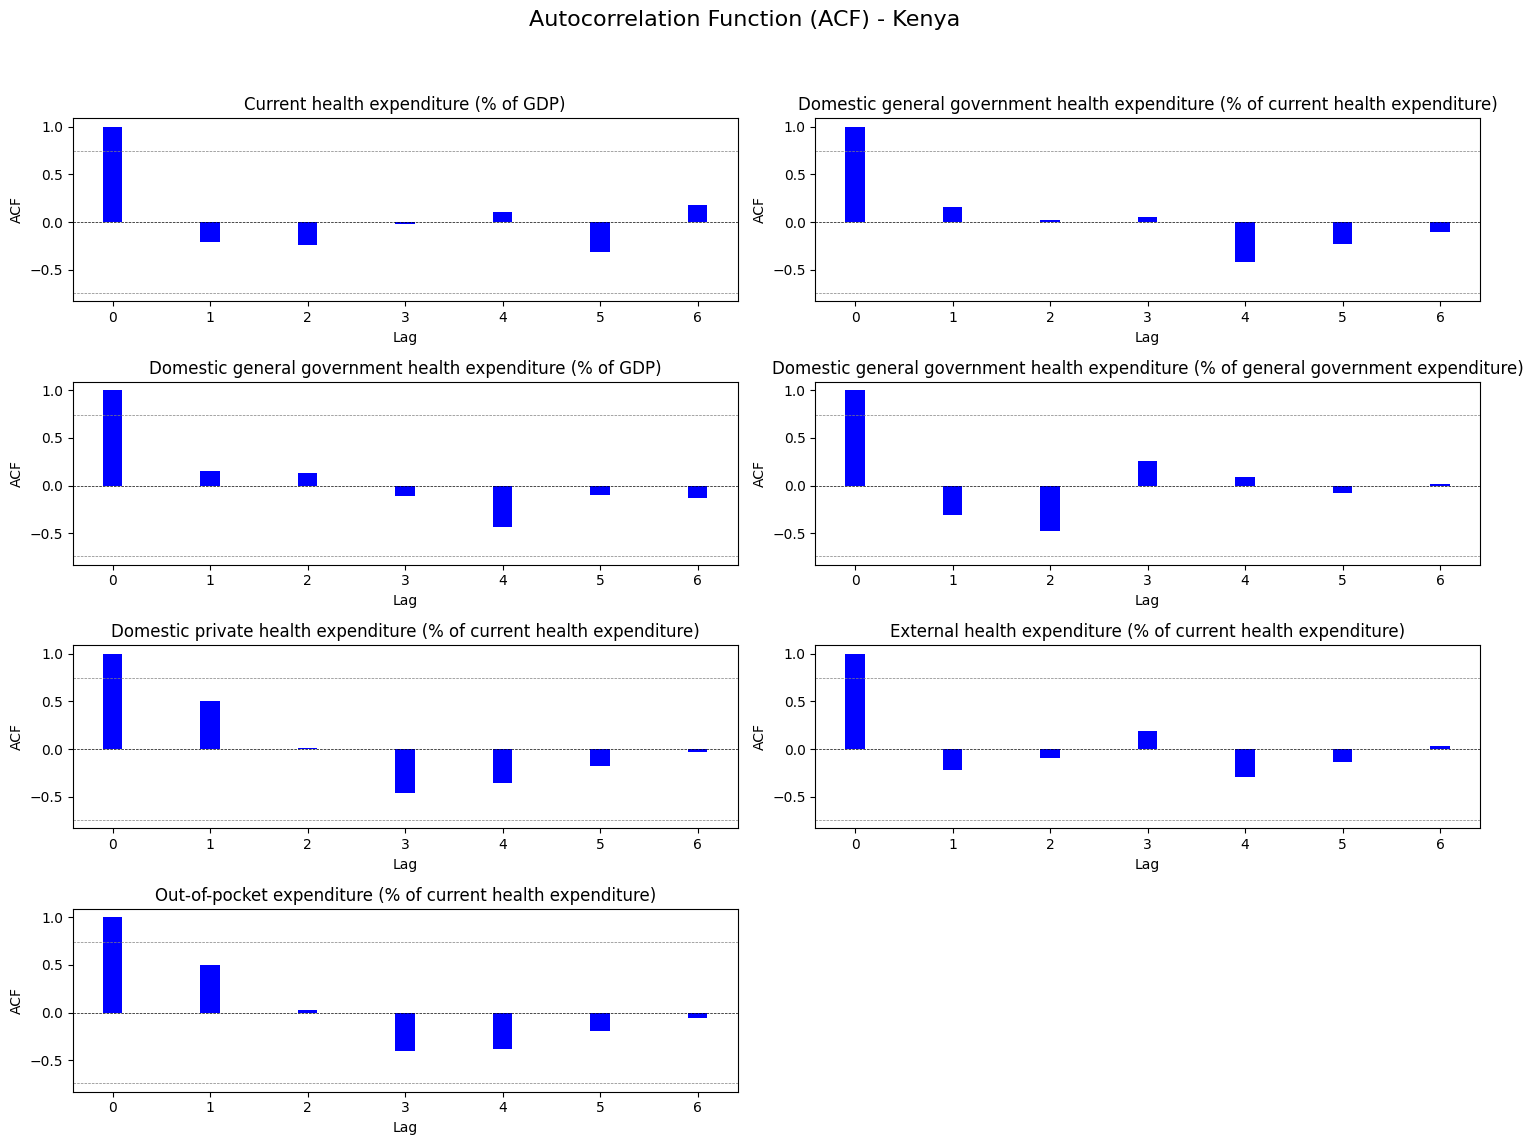

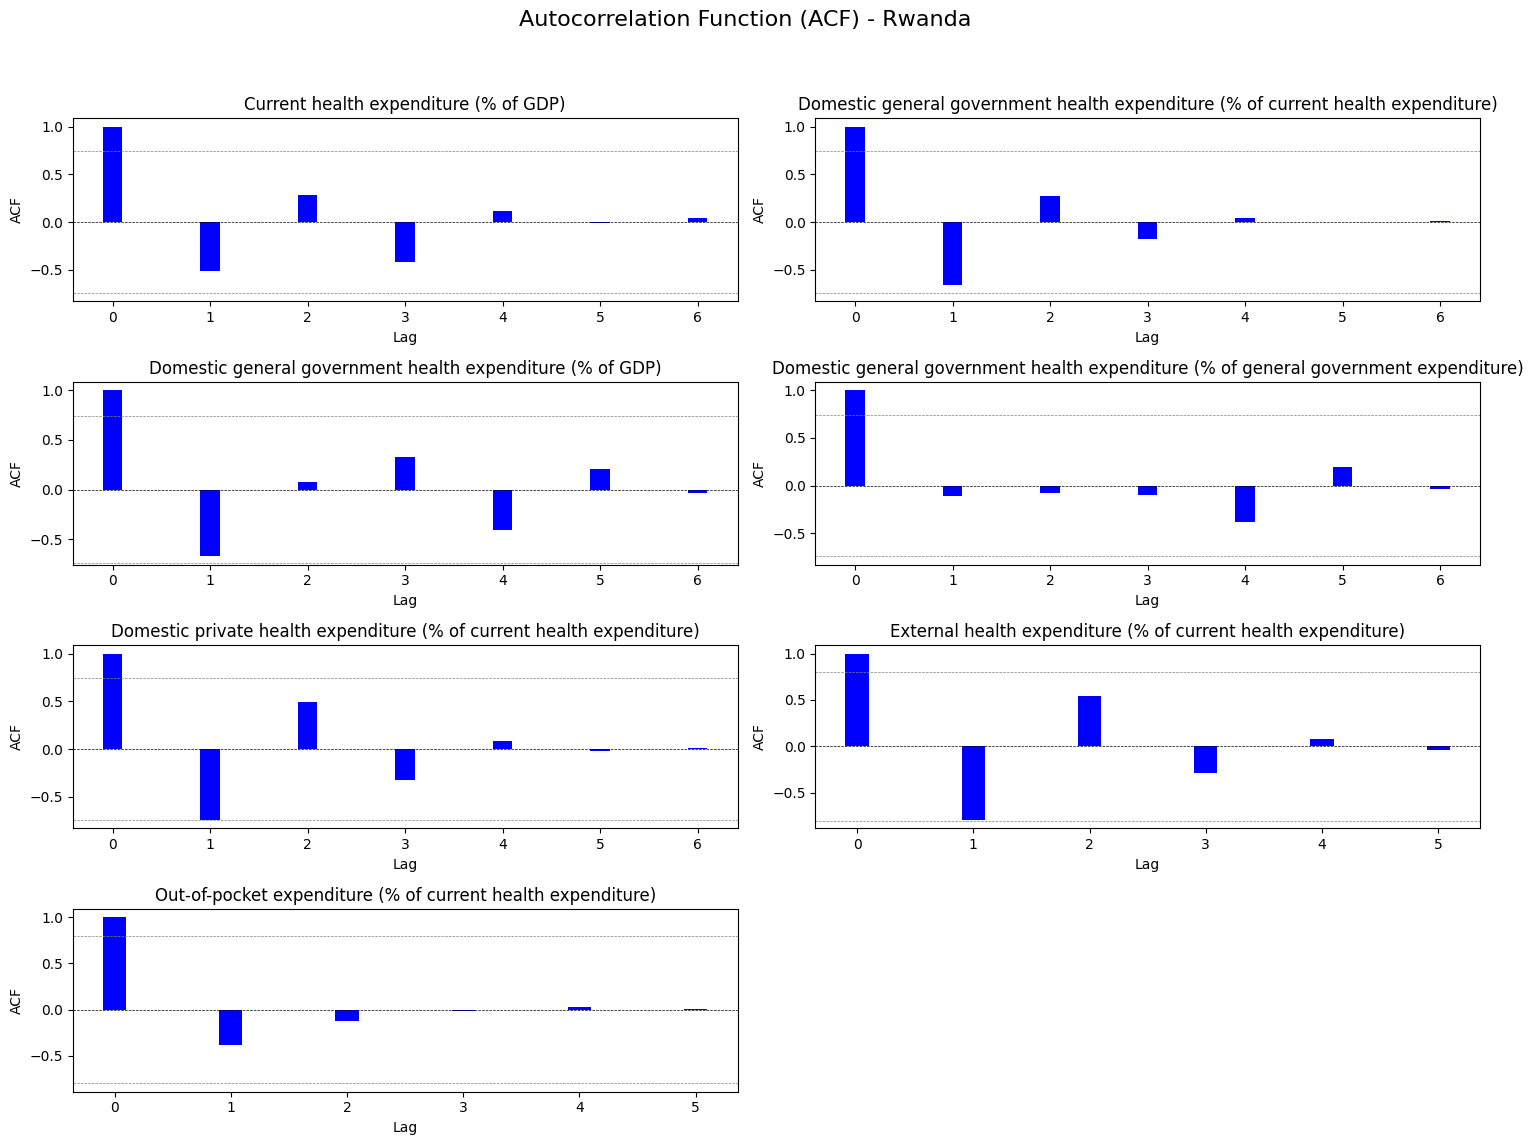

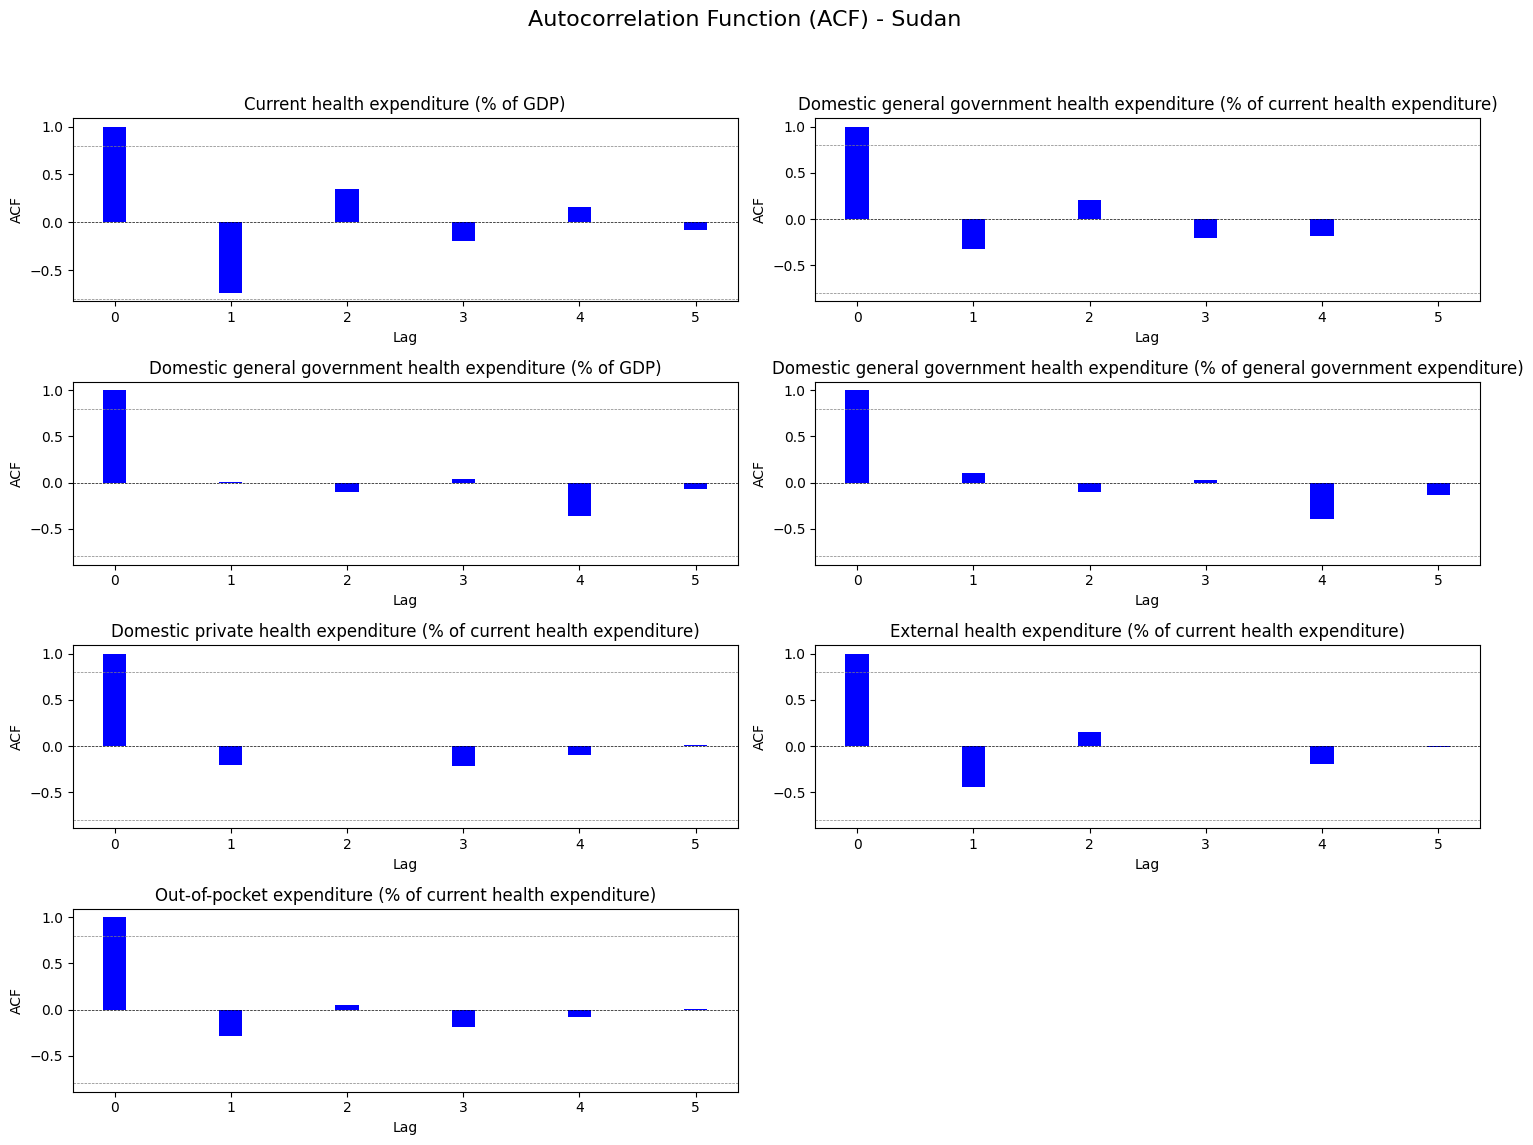

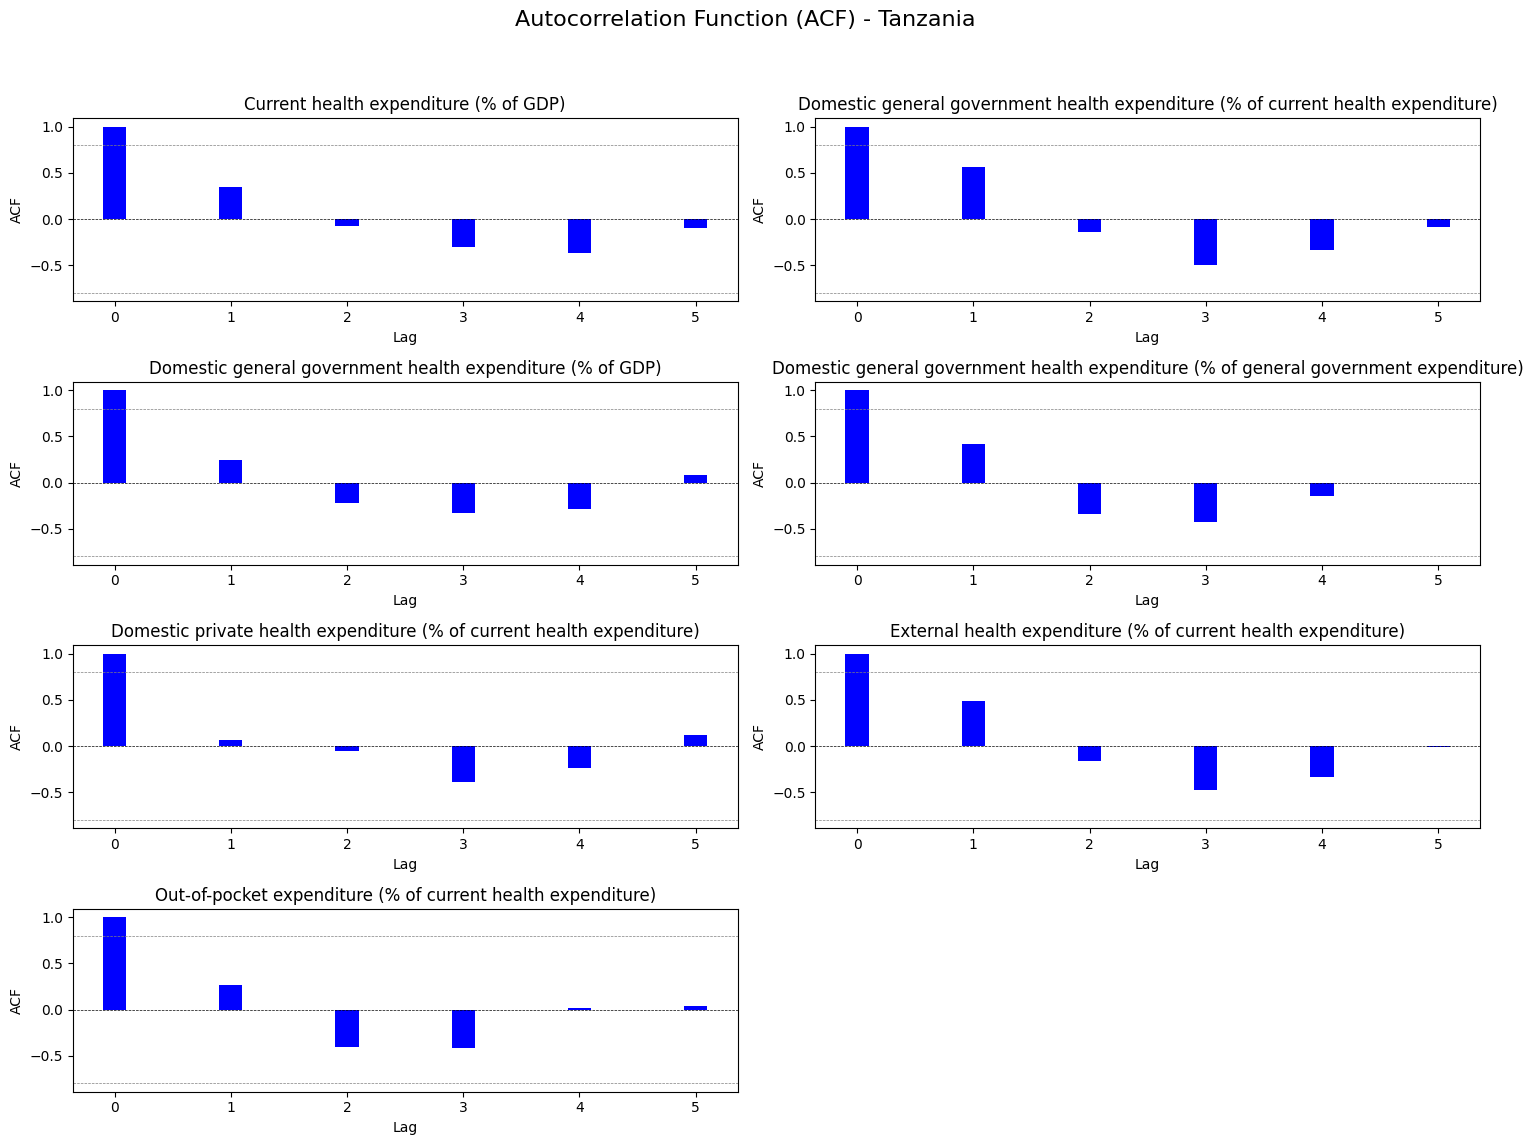

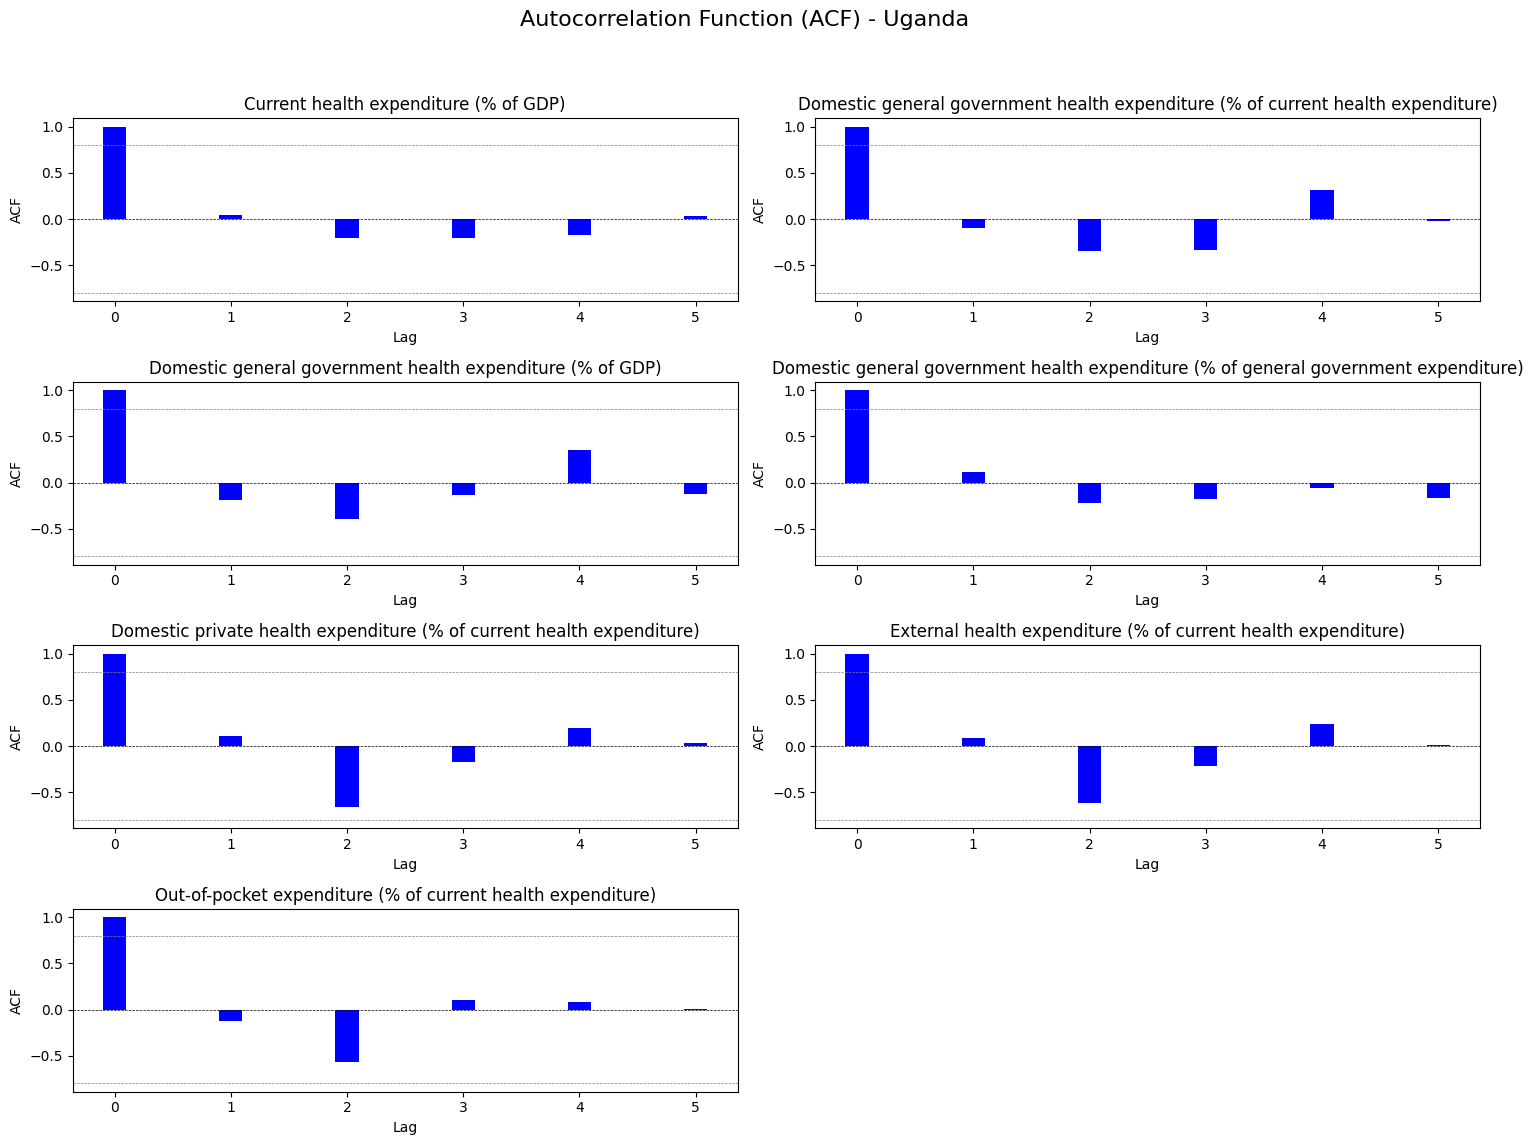

In [26]:
# Get the unique countries from the health_df DataFrame
countries = health_df['Country'].unique()

# Iterate over the countries
for country in countries:
    # Get the data for the specified country
    data_2 = split_data(country)
    acf_train_data = data_2[1]

    # Get the indicators for the specified country
    indicators = list(acf_train_data.keys())

    # Determine the grid size based on the number of indicators
    num_indicators = len(indicators)
    num_cols = 2  # Number of columns in the grid
    num_rows = (num_indicators - 1) // num_cols + 1  # Number of rows in the grid

    # Create the grid of visualizations for the current country
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    fig.suptitle(f'Autocorrelation Function (ACF) - {country}', fontsize=16)

    # Iterate over the indicators for the current country
    for i, indicator in enumerate(indicators):
        # Calculate ACF using statsmodels
        acf, conf_int = sm.tsa.acf(acf_train_data[indicator]['Percentage Diff'], nlags=10, alpha=0.05)

        # Determine the position in the grid
        row = i // num_cols
        col = i % num_cols

        # Plot ACF results in the corresponding subplot
        ax = axes[row, col]
        ax.bar(range(len(acf)), acf, width=0.2, color='b', align='center')
        ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
        ax.axhline(y=-1.96/np.sqrt(len(acf)), color='gray', linestyle='--', linewidth=0.5)
        ax.axhline(y=1.96/np.sqrt(len(acf)), color='gray', linestyle='--', linewidth=0.5)
        ax.set_xlabel('Lag')
        ax.set_ylabel('ACF')
        ax.set_title(f'{indicator}')

    # Remove unused subplots
    for j in range(num_indicators, num_rows * num_cols):
        axes.flatten()[j].remove()

    # Adjust the spacing between subplots
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the grid of visualizations for the current country
    plt.show()

- The acf values obtained from the time series data proved to be statistically not significant.

- This confirmed that the values in the time series and its lagged values are not correlated to each other proving that the time series data had no seasonality.

### 6.3 BASELINE MODEL

#### 6.3.1 ARIMA Model

In [27]:
# Function that iterates through the indicator for the country and returns a dictionary of RMSE values
def arima_model(country, order):
    data = split_data(country)
    training_data = data[1]
    testing_data = data[0]
    country_results = {}

    for indicator in training_data.keys():
        model = sm.tsa.ARIMA(training_data[indicator]['Percentage Diff'], order=order)
        results = model.fit()

        # Making predictions
        testing_data_forecast = results.forecast(steps=len(testing_data[indicator]))
        training_data_forecast = results.forecast(steps=len(training_data[indicator]))

        # Evaluate
        train_rmse = mean_squared_error(training_data[indicator]['Percentage Diff'], training_data_forecast, squared=False)
        test_rmse = mean_squared_error(testing_data[indicator]['Percentage Diff'], testing_data_forecast, squared=False)

        country_results[indicator] = {
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse
        }

    return country_results

# Initialize variables for summing up the RMSE values
total_train_rmse = 0.0
total_test_rmse = 0.0
num_categories = 0

# Define a dictionary to store the results
results = {}

# Loop through your countries here
for country in countries:
    country_results = arima_model(country, order=(1, 0, 0))
    results[country] = country_results

# Iterate over countries and indicators
for country, indicators in results.items():
    for indicator, rmse_scores in indicators.items():
        total_train_rmse += rmse_scores['Train RMSE']
        total_test_rmse += rmse_scores['Test RMSE']
        num_categories += 1

# Check if there are categories
if num_categories > 0:
    # Calculate the average train RMSE and test RMSE
    average_train_rmse = total_train_rmse / num_categories
    average_test_rmse = total_test_rmse / num_categories

    # Print the results
    print(f'Average Arima Model Train RMSE: {average_train_rmse}')
    print(f'Average Arima Model Test RMSE: {average_test_rmse}')
else:
    print("No categories found.")

Average Arima Model Train RMSE: 2.831715536641521
Average Arima Model Test RMSE: 2.0201135981983978


- ARIMA model had a quite high RMSE as the baseline model which was not good, ARIMA model was not suitable for the time series data at use as Moving Average model is not able to capture complex patterns or long-term dependencies in the absence of seasonality.
- Considering ARIMA model performance, the next step was to use Autorgressive model, as due to ite regressive nature it was the better choice as by utilizing past observations to predict future values, the model can capture and exploit the inherent patterns and trends present in the data.

### 6.4 Second Model

#### 6.4.1 Auto-Regressive Model (AR)

#### Partial Autocorrelation Function (PACF)
- Partial Auto-correlation is the statistical tool used in understanding the structure and patterns in the time series data by measuring the correlation between observations at different lags. It also guided model selection.


#### 6.4.1.1 Plotting PACF

In [28]:
# Function for plotting Partial Autocorrelation Function (PACF) indicators for a given country
def plot_pacf_indicators(country):
    countries = health_df['Country'].unique()
    for country in countries:
        data = split_data(country)  # Splitting the data for the specified country
        pacf_train_data = data[1]  # Extracting the PACF train data
        column_name = 'Percentage Diff'  # Replace with the actual column name representing the data
        
        indicators = list(pacf_train_data.keys())  # Extracting the list of indicators from the PACF train data
        num_indicators = len(indicators)  # Counting the number of indicators
        grid_cols = 2  # Setting the number of columns for the subplots grid (can be adjusted as needed)
        grid_rows = (num_indicators + grid_cols - 1) // grid_cols  # Calculating the number of rows based on the number of indicators

        # Creating the subplots grid for plotting
        fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(15, 12))
        fig.suptitle(f'Partial Autocorrelation Function (PACF) - {country}', fontsize=16)
        axs = axs.flatten()

        for i, indicator in enumerate(indicators):
            ax = axs[i]

            if indicator in pacf_train_data:
                pacf_data = pacf_train_data[indicator][column_name]  # Extracting the PACF data for the indicator
                plot_pacf(pacf_data, lags=2, ax=ax)  # Plotting the PACF for the indicator
                ax.set_title(indicator)
                ax.set_xlabel('Lag')
                ax.set_ylabel('PA')

        # Hiding any unused subplots
        for j in range(num_indicators, len(axs)):
            axs[j].axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting layout and spacing of subplots
        plt.show()  # Displaying the plot

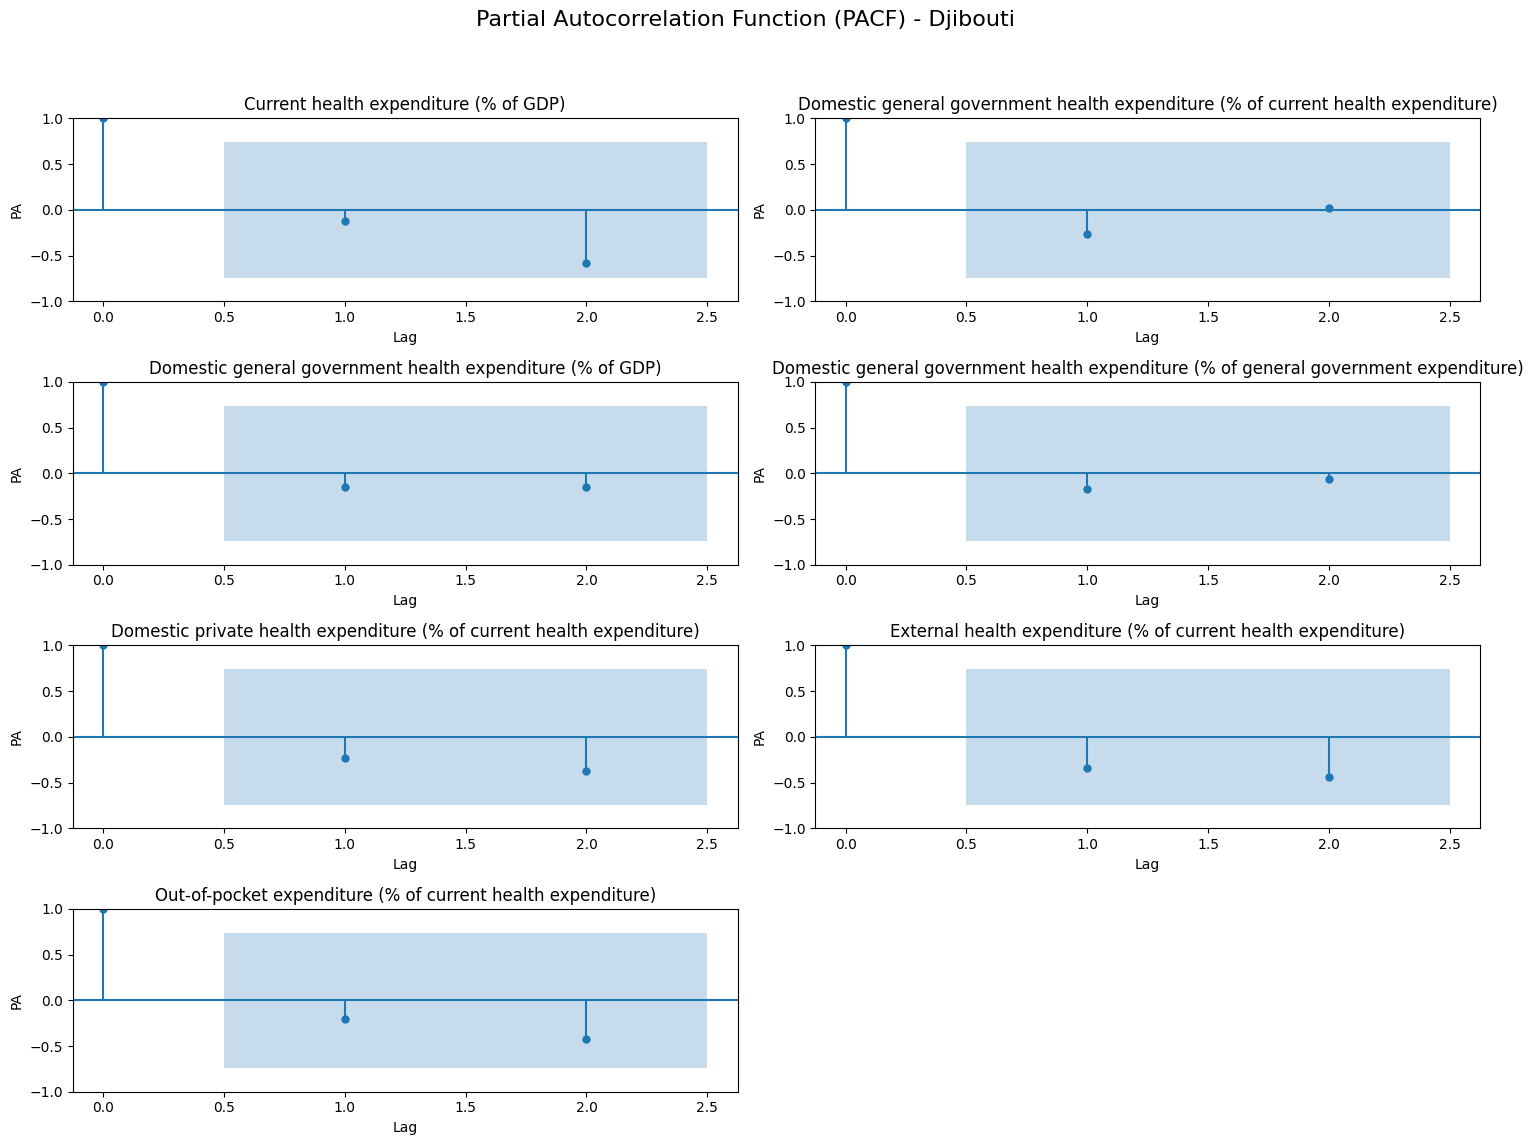

c:\Users\HP\east-african-dvlp-indicators\venv\lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning:

Matrix is singular. Using pinv.



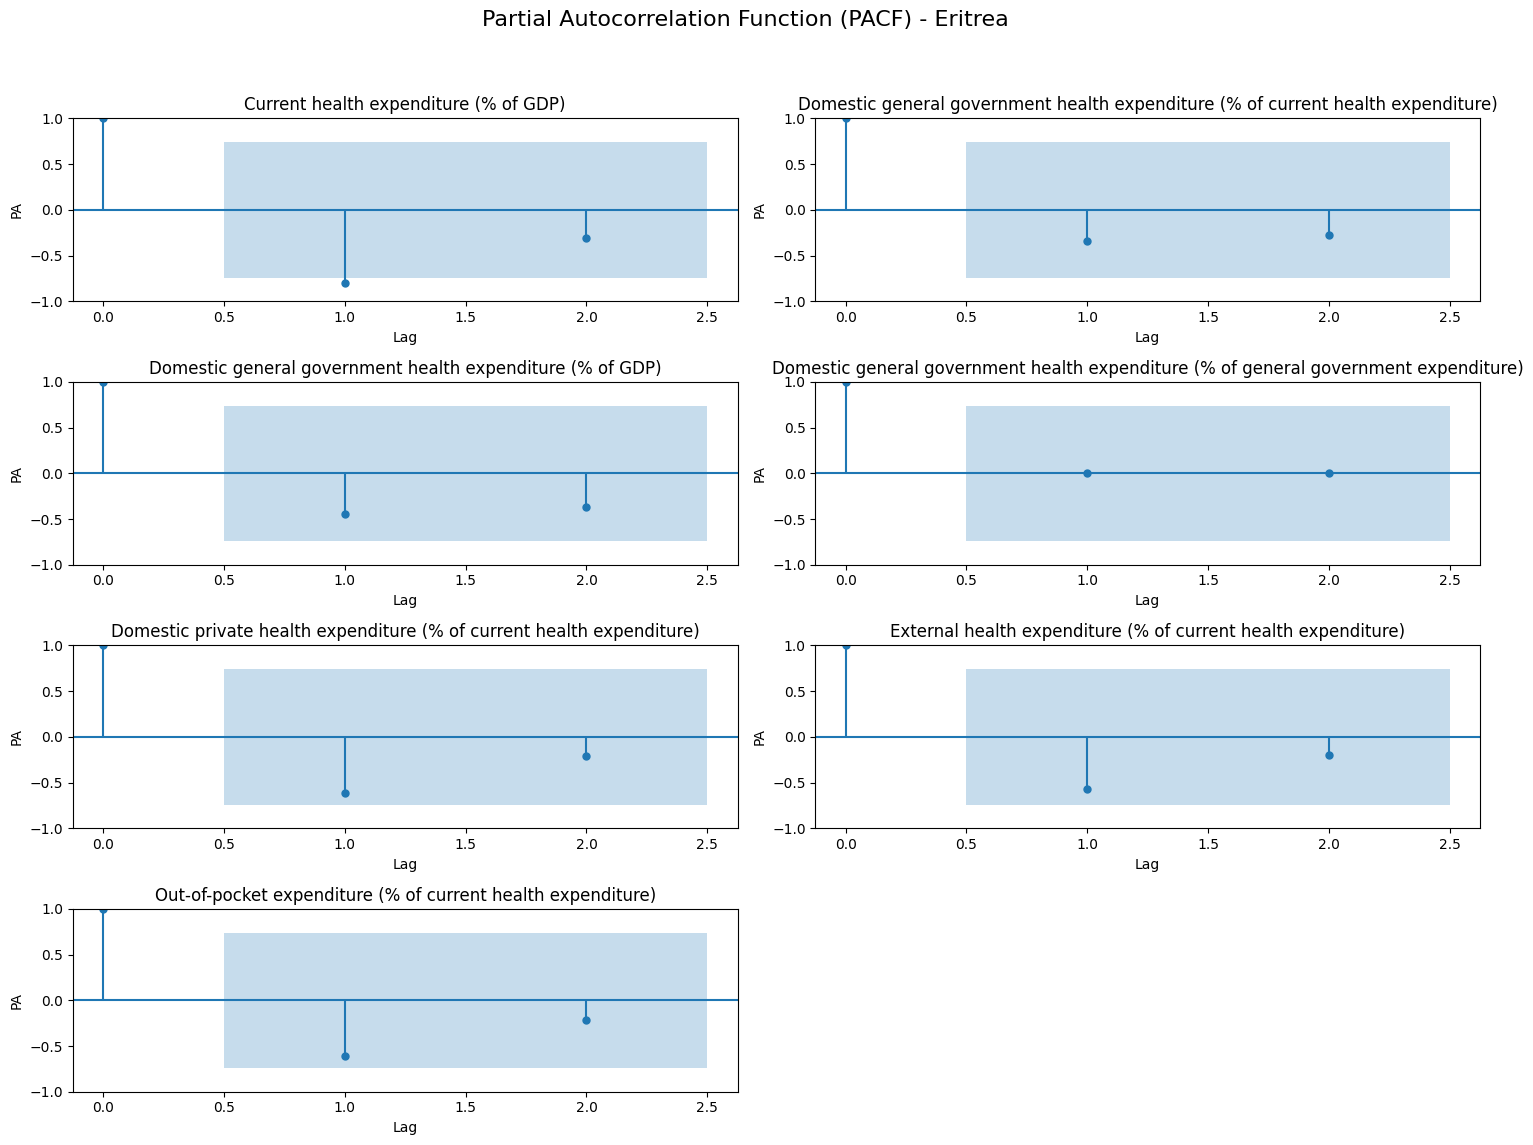

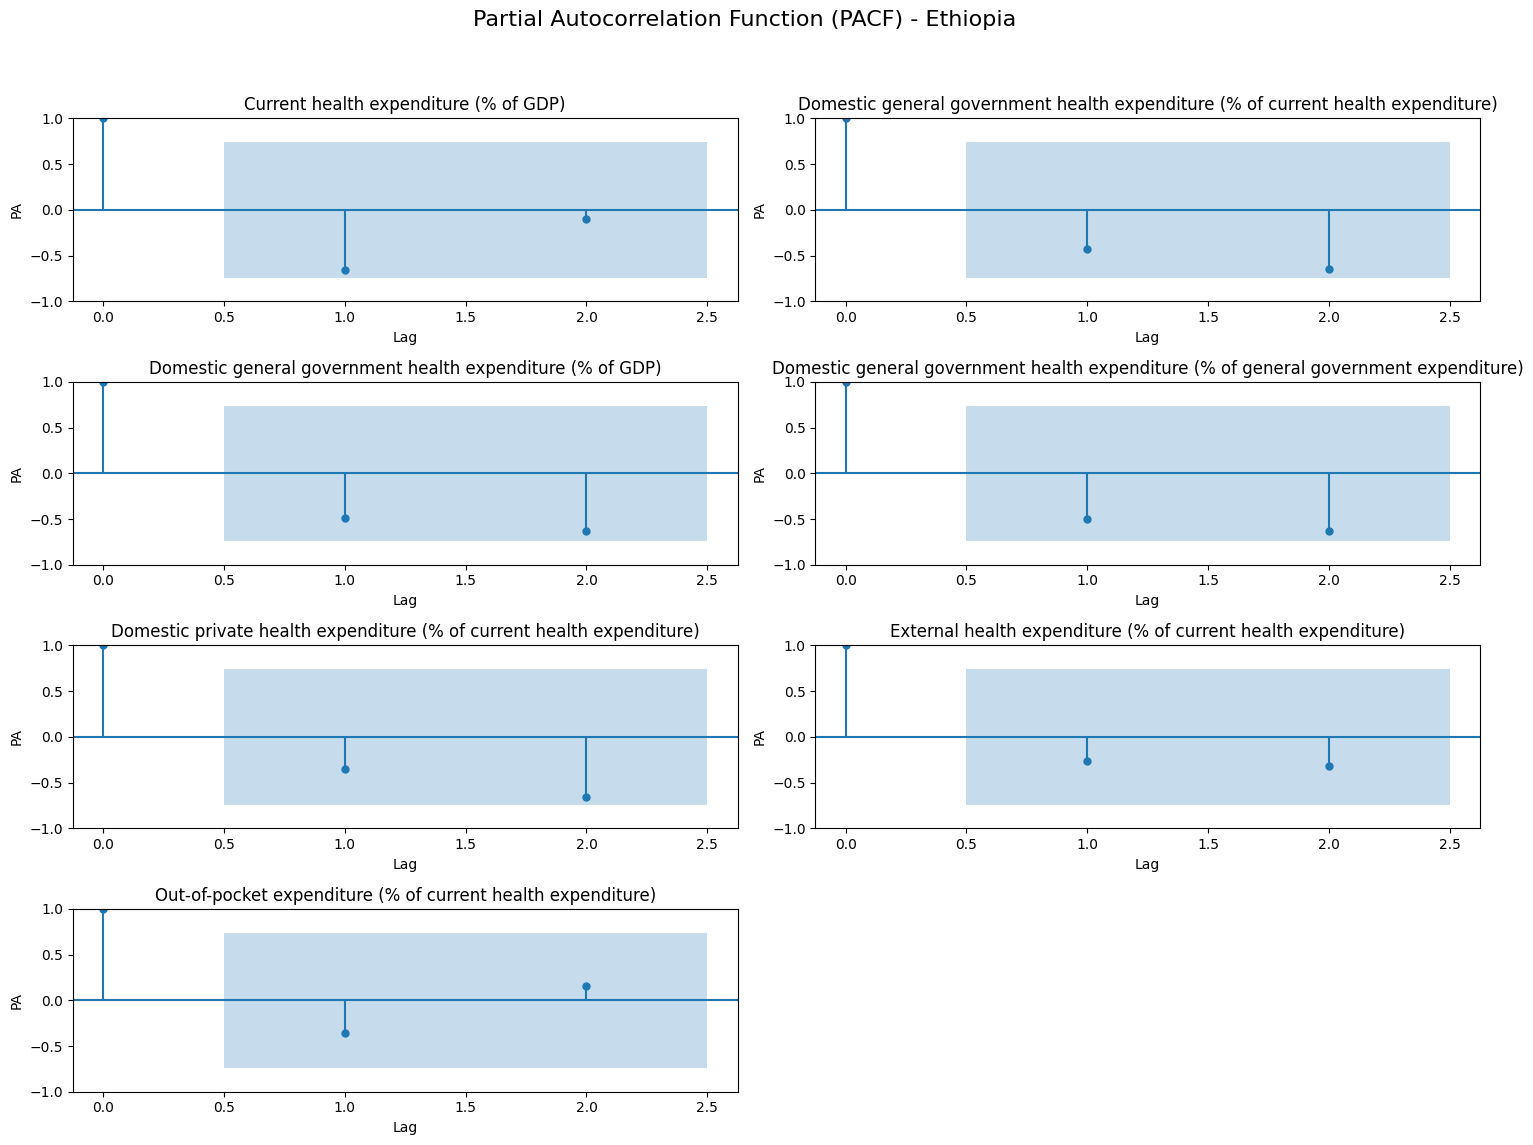

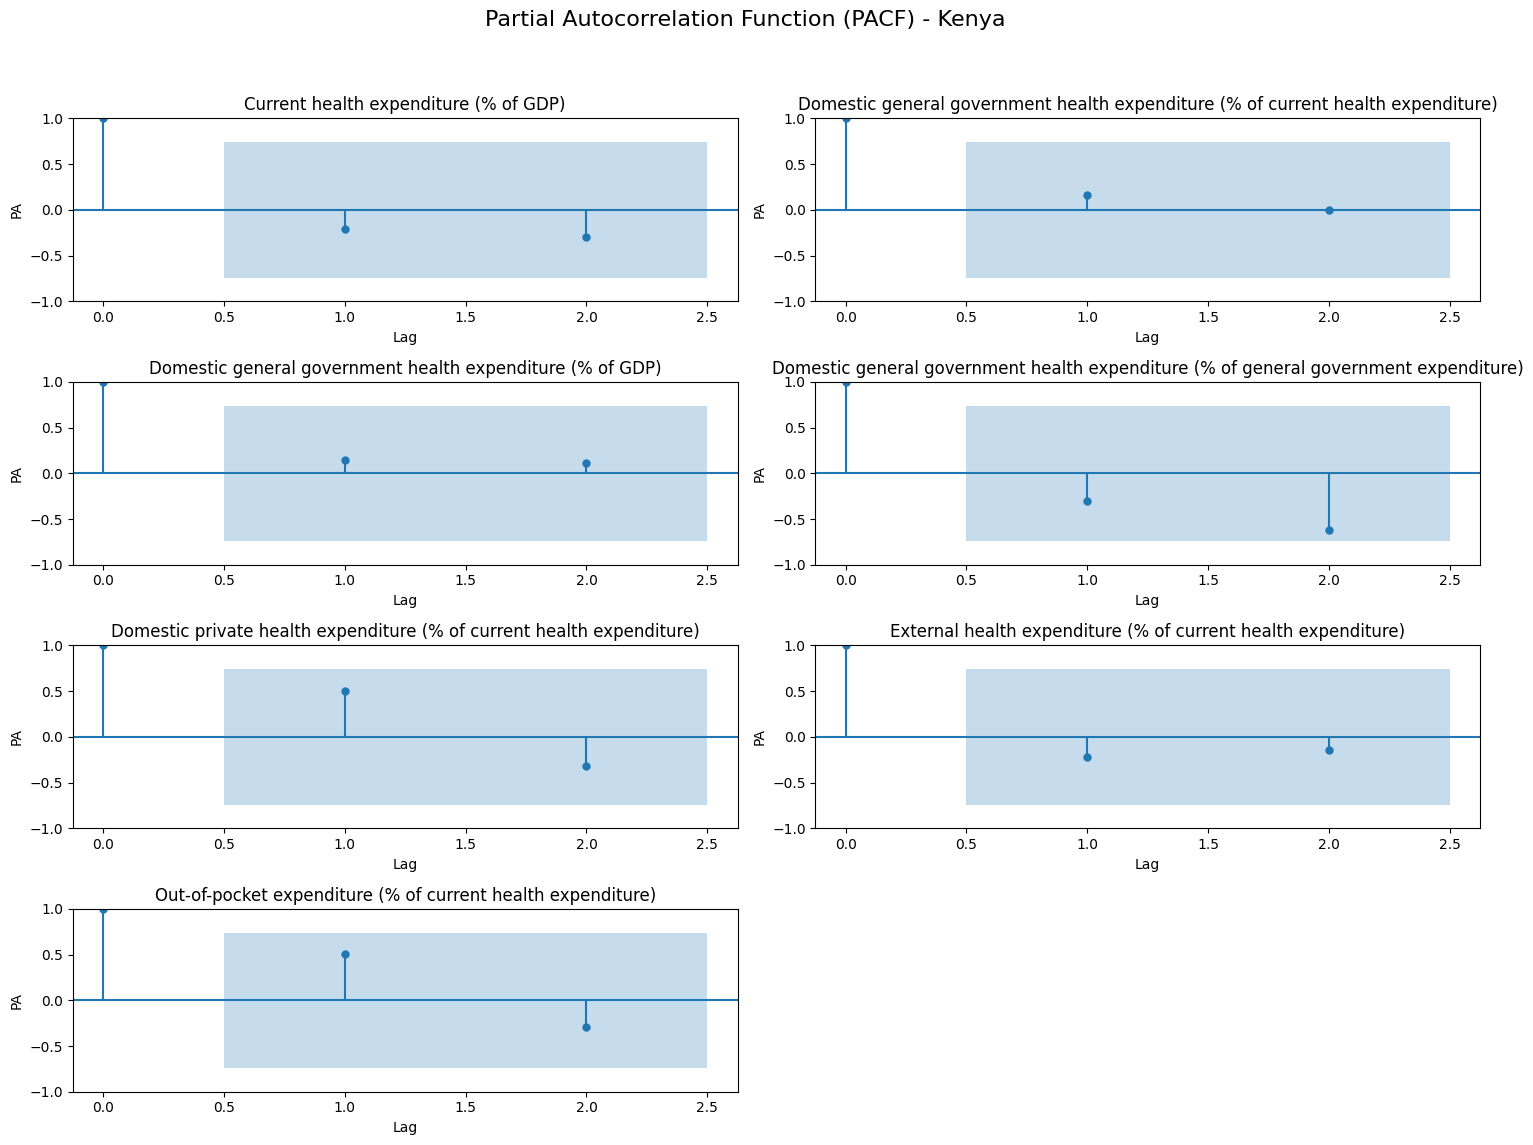

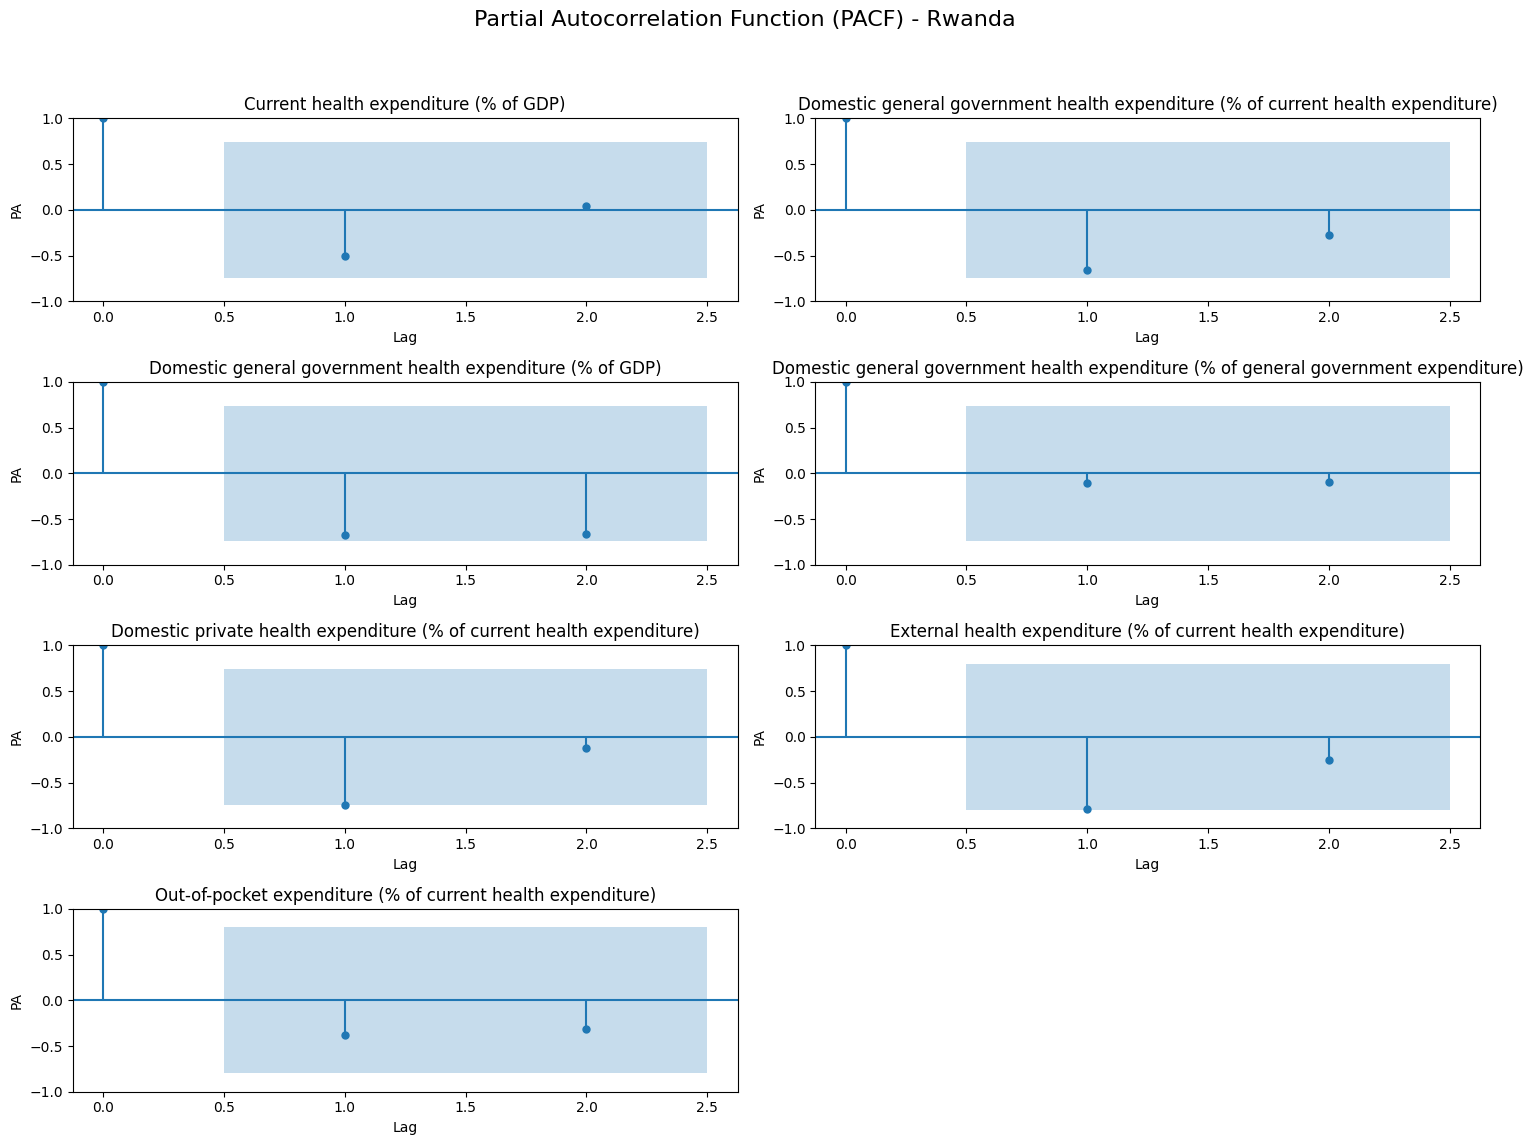

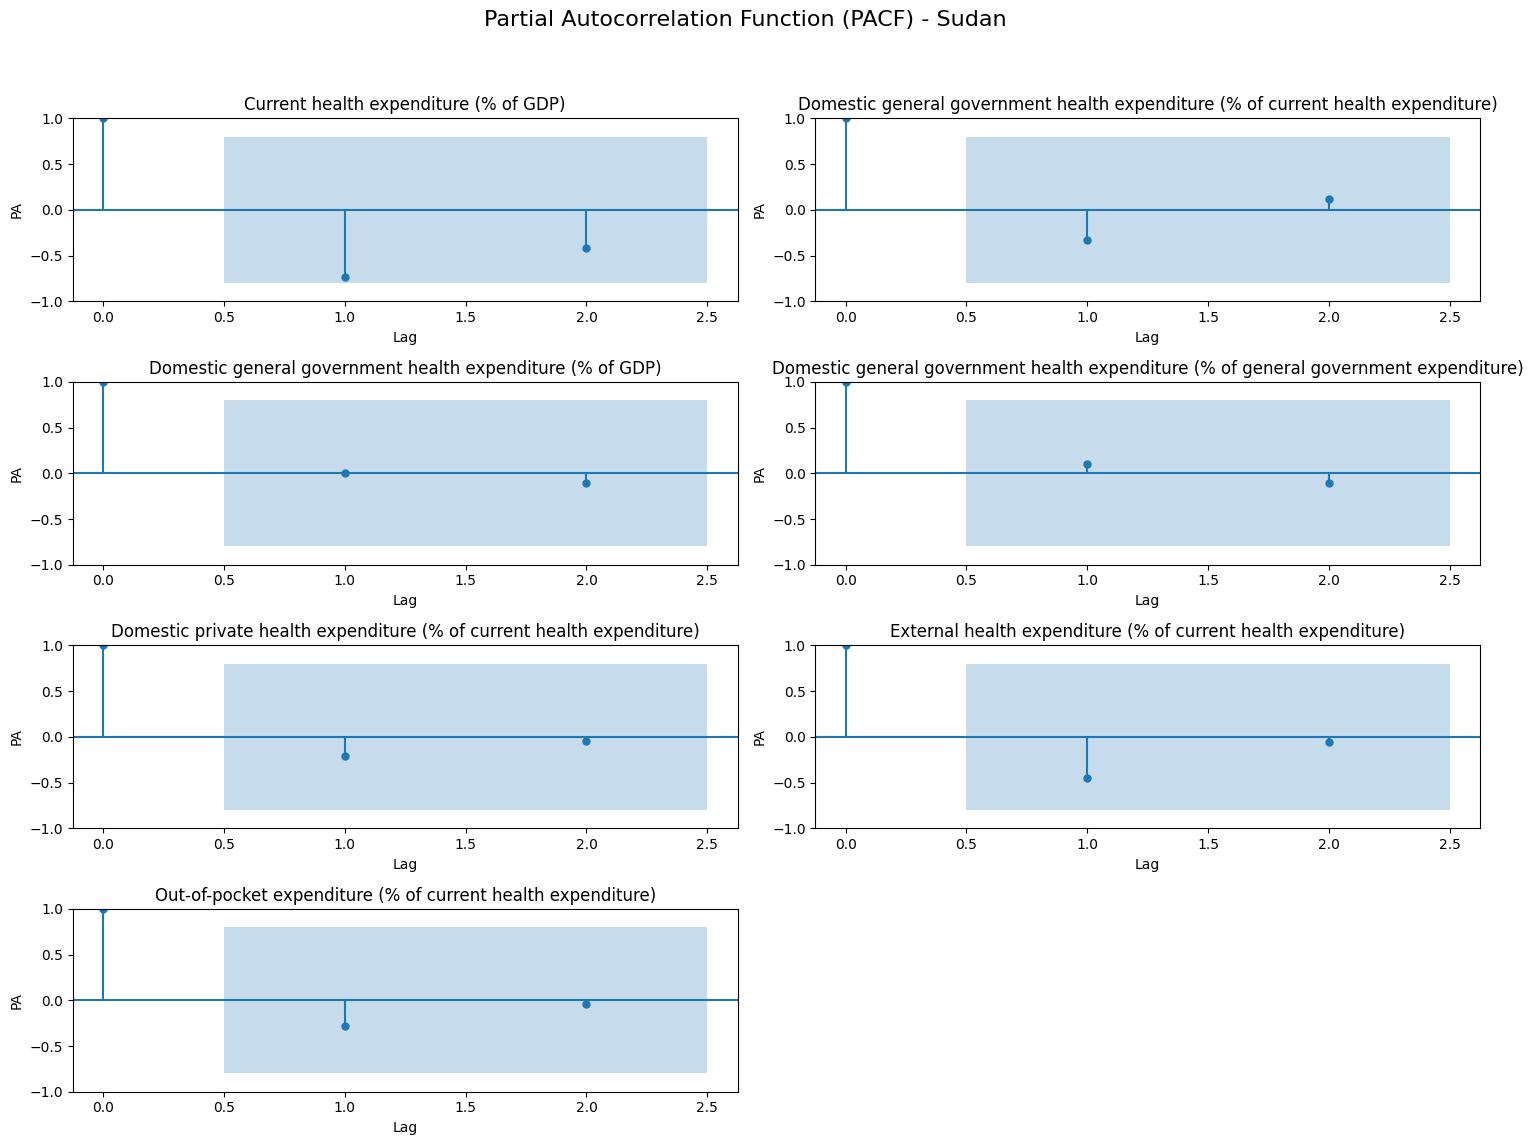

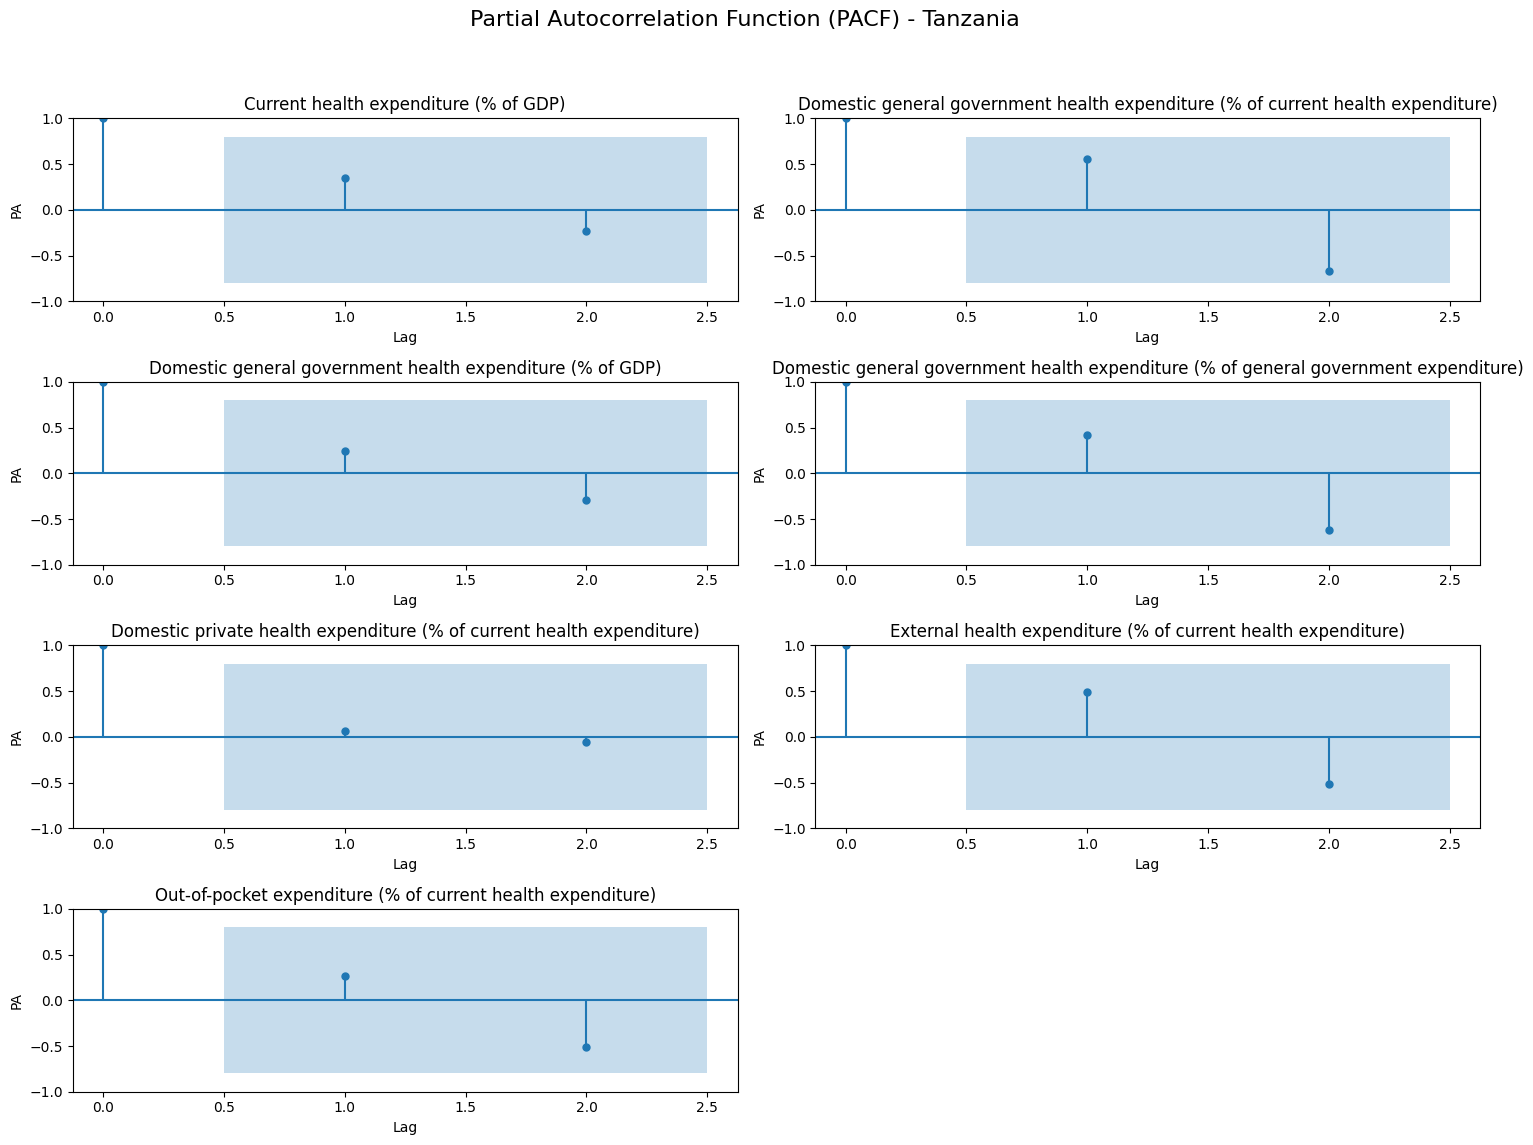

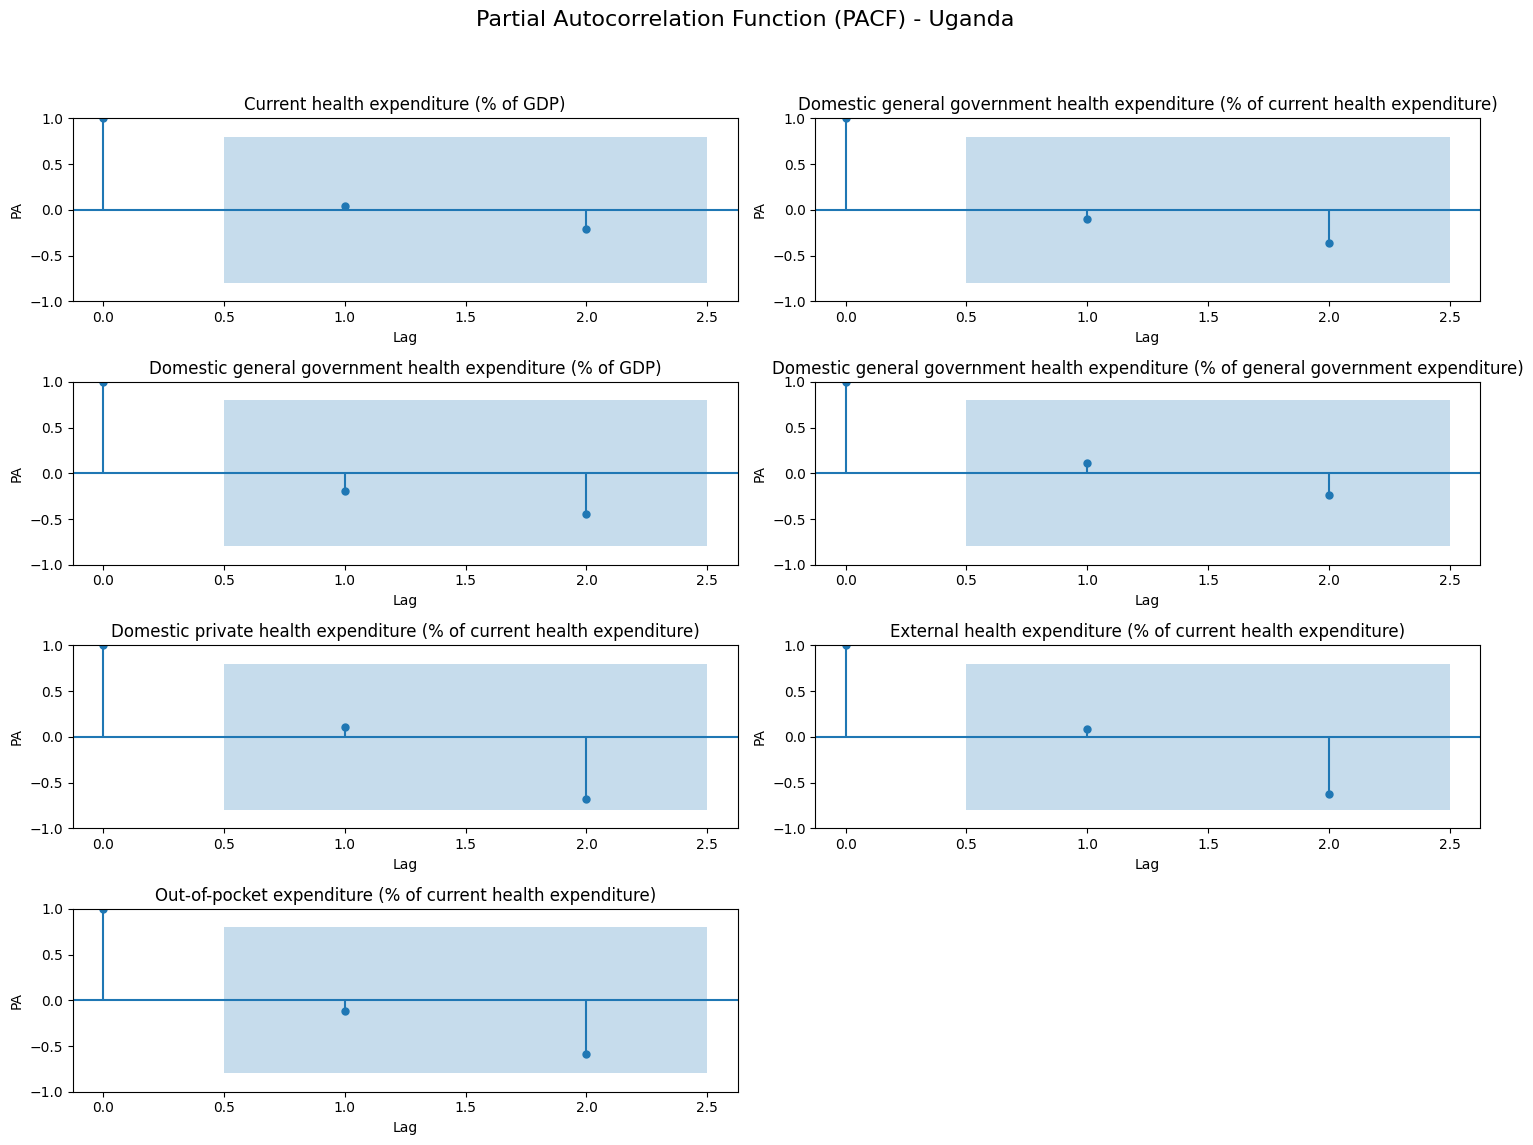

In [29]:
# Pacf function
plot_pacf_indicators(country)

- By examining the PACF plot, the number of lagged terms to include in the AR model can be determined. 

- The order of the AR model (p) corresponds to the highest significant spike (above a certain threshold) in the PACF plot before the values start to decay.

### 6.4.1 First Tuned AR model

In [30]:

# Function that fits the AR model and returns RMSE for training and testing data
def AR_model(country, order_range):
    data = split_data(country)
    ar_train_data = data[1]
    country_results = {}

    for indicator, ar_data in ar_train_data.items():
        # Fit the AR model
        model = sm.tsa.AutoReg(ar_data['Percentage Diff'], lags=order_range)
        ar_model = model.fit()

        # Get the predicted values for training data
        ar_train_predictions = ar_model.predict(start=order_range, end=len(ar_data)-1)

        # Saving the model
        with open('AR_model.pkl','wb') as f:
            pickle.dump(ar_model, f)

        # Calculate RMSE for training data
        train_rmse = np.sqrt(mean_squared_error(ar_data['Percentage Diff'][order_range:], ar_train_predictions, squared=False))

        # Get the corresponding test data for the indicator
        ar_test_data = data[0][indicator]['Percentage Diff']

        # Get the predicted values for test data
        ar_test_predictions = ar_model.predict(start=len(ar_data), end=len(ar_data)+len(ar_test_data)-1)

        # Calculate RMSE for test data
        test_rmse = np.sqrt(mean_squared_error(ar_test_data, ar_test_predictions, squared=False))

        country_results[indicator] = {
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse
        }

    return country_results

# Initialize variables for summing up the RMSE values
total_ar_train_rmse = 0.0
total_ar_test_rmse = 0.0
total_ar_num_categories = 0

# Define a dictionary to store the results
ar_results = {}

# Loop through your countries here for AR model
for country in countries:
    ar_country_results = AR_model(country, order_range=2)
    ar_results[country] = ar_country_results

# Iterate over countries and indicators for AR model
for country, indicators in ar_results.items():
    for indicator, rmse_scores in indicators.items():
        total_ar_train_rmse += rmse_scores['Train RMSE']
        total_ar_test_rmse += rmse_scores['Test RMSE']
        total_ar_num_categories += 1

# Check if there are categories for AR model
if total_ar_num_categories > 0:
    # Calculate the average AR train RMSE and test RMSE
    average_ar_train_rmse = total_ar_train_rmse / total_ar_num_categories
    average_ar_test_rmse = total_ar_test_rmse / total_ar_num_categories

    # Print the AR model results
    print("AR Model Results with order=2:")
    print(f'Average Train RMSE: {average_ar_train_rmse:.4f}')
    print(f'Average Test RMSE: {average_ar_test_rmse:.4f}')
else:
    print("No categories found for AR model.")

AR Model Results with order=2:
Average Train RMSE: 0.9969
Average Test RMSE: 2.8009


### 6.4.2 Second Tuned AR Model

In [31]:

# Initialize variables for summing up the RMSE values
total_ar1_train_rmse = 0.0
total_ar1_test_rmse = 0.0
total_ar1_num_categories = 0

# Define a dictionary to store the results
ar1_results = {}

# Loop through your countries here for AR model
for country in countries:
    ar1_country_results = AR_model(country, order_range=1)
    ar1_results[country] = ar1_country_results

# Iterate over countries and indicators for AR model
for country, indicators in ar_results.items():
    for indicator, rmse_scores in indicators.items():
        total_ar1_train_rmse += rmse_scores['Train RMSE']
        total_ar1_test_rmse += rmse_scores['Test RMSE']
        total_ar1_num_categories += 1

# Check if there are categories for AR model
if total_ar1_num_categories > 0:
    # Calculate the average AR train RMSE and test RMSE
    average_ar1_train_rmse = total_ar1_train_rmse / total_ar1_num_categories
    average_ar1_test_rmse = total_ar1_test_rmse / total_ar1_num_categories

    # Print the AR model results
    print("AR Model Results with order=1:")
    print(f'Average Train RMSE: {average_ar1_train_rmse:.4f}')
    print(f'Average Test RMSE: {average_ar1_test_rmse:.4f}')
else:
    print("No categories found for AR model.")

AR Model Results with order=1:
Average Train RMSE: 0.9969
Average Test RMSE: 2.8009


- The Partial Autocorrelation Function (PACF) analysis suggests that for the given dataset, the appropriate order for the Autoregressive (AR) model is limited to either 1 or 2. 

- By examining the PACF plot, we observe significant correlations at lagged values of 1 and 2 only, which indicates that incorporating one or two lagged terms in the AR model can effectively capture the autocorrelation patterns present in the data. 

- The Autoregressive model performed at the same degree with a similar train and test RMSE value for the AR model with order (1) and with order(2). AR models are perfect for time series data that has no seasonality but due its nature to be best at predicting values at short term periods caused the Test RMSE values to not be better than ARIMA Test RMSE values for both AR models.

## 6.5 Third Model

### 6.5.1 Tuned Simple Exponential Smoothing Model (SES)

In [32]:
# Function that iterates through the indicator for the country and prints out the RMSE after fitting SES model
from sklearn.model_selection import ParameterGrid

def ses_model(country):
    data = split_data(country)
    training_data = data[1]
    testing_data = data[0]
    country_results = {}
    
    for indicator in training_data.keys():
        # Define the grid of parameter values to search
        param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}
        grid = ParameterGrid(param_grid)

        best_rmse = float('inf')
        best_alpha = None

        for params in grid:
            # Fit the SES model with the current parameter combination
            model = sm.tsa.SimpleExpSmoothing(training_data[indicator]['Percentage Diff'])
            results = model.fit(smoothing_level=params['alpha'])

            # Making predictions
            testing_data_forecast = results.forecast(steps=len(testing_data[indicator]))
            training_data_forecast = results.forecast(steps=len(training_data[indicator]))

            # Evaluate
            train_rmse = mean_squared_error(training_data[indicator]['Percentage Diff'], training_data_forecast, squared=False)
            test_rmse = mean_squared_error(testing_data[indicator]['Percentage Diff'], testing_data_forecast, squared=False)

            # Check if the current parameter combination improves the performance
            if test_rmse < best_rmse:
                best_rmse = test_rmse
                best_alpha = params['alpha']

        country_results[indicator] = {
            "Best Alpha": best_alpha,
            "Train RMSE": train_rmse,
            "Test RMSE" : best_rmse
        }
    
    return country_results, training_data_forecast, testing_data_forecast, training_data, testing_data

# Initialize variables for summing up the RMSE values
total_train_rmse = 0.0
total_test_rmse = 0.0
num_categories = 0

# Define a dictionary to store the results
results = {}

# Loop through your countries here
for country in countries:
    country_results, training_data_forecast, testing_data_forecast, training_data, testing_data = ses_model(country)
    results[country] = country_results

# Iterate over countries and indicators
for country, indicators in results.items():
    for indicator, rmse_scores in indicators.items():
        total_train_rmse += rmse_scores['Train RMSE']
        total_test_rmse += rmse_scores['Test RMSE']
        num_categories += 1

# Check if there are categories
if num_categories > 0:
    # Calculate the average train RMSE and test RMSE
    average_train_rmse = total_train_rmse / num_categories
    average_test_rmse = total_test_rmse / num_categories

    # Print the results
    print("SES Model results:")
    print(f'Average Train RMSE: {average_train_rmse}')
    print(f'Average Test RMSE: {average_test_rmse}')
else:
    print("No categories found.")

SES Model results:
Average Train RMSE: 2.8423408322835404
Average Test RMSE: 1.7191959280682878


- SES model does not take into account other factors such as trend or seasonality hence suitable for the time series data used, hence the model had the highest average Test RMSE value among all other three models(ARIMA and AR models). 
- Due to its nature it is particularly useful when the data does not contain complex patterns or when the goal is to smooth out random noise and identify the underlying trend whcih was particularly accurate for our data.



## 6.6 Final Model

### 6.6.1 Tuned Long Term Short Term Memory Network (LSTM)

In [37]:
n_steps = 2
def lstm_model(country):
    data = split_data(country)
    training_data = data[1]
    testing_data = data[0]

    # Empty dictionaries to store train and test RMSE values
    train_rmse = {}
    test_rmse = {}
    
    for indicator in training_data.keys():
        # Reshape the training and testing values
        train_values = training_data[indicator]['Percentage Diff'].values.reshape(-1, 1)
        test_values = testing_data[indicator]['Percentage Diff'].values.reshape(-1, 1)


        # Split the data into samples for training and testing
        X_train, y_train = [], []
        for i in range(n_steps, len(train_values)):
            X_train.append(train_values[i-n_steps:i, 0])
            y_train.append(train_values[i, 0])
        X_train, y_train = np.array(X_train), np.array(y_train)

        X_test, y_test = [], []
        for i in range(n_steps, len(test_values)):
            X_test.append(test_values[i-n_steps:i, 0])
            y_test.append(test_values[i, 0])
        X_test, y_test = np.array(X_test), np.array(y_test)

        # Reshape the data for input into the LSTM model
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        # Initialize the Sequential model
        model = Sequential()

        # Add the LSTM layers with dropout regularization
        model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
        model.add(Dropout(0.2))  # Dropout regularization
        model.add(LSTM(32, activation='relu', return_sequences=True))
        #model.add(Dropout(0.2))  # Dropout regularization
        model.add(LSTM(32, activation='relu', return_sequences=False))
        #model.add(Dropout(0.2))  # Dropout regularization
        model.add(Dense(1))  # Output layer

        # Compile the model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mean_squared_error'
        )

        # Create an EarlyStopping callback to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

        # Define the path for saving checkpoints
        checkpoint_folder = "weights"
        os.makedirs(checkpoint_folder, exist_ok=True)
        checkpoint_filepath = os.path.join(checkpoint_folder, f'{country}_{indicator}_lstm_model.h5')

        # Create a ModelCheckpoint callback to save the best model weights
        model_checkpoint = ModelCheckpoint(
            checkpoint_filepath,
            monitor='val_loss',
            save_best_only=True,
            mode='min',
            verbose=0
        )

        # Fit the model
        model.fit(
            X_train,
            y_train,
            epochs=100,
            callbacks=[early_stopping, model_checkpoint],
            validation_data=(X_test, y_test),
            verbose=0
        )

        # Load the best model weights
        model.load_weights(os.path.join(checkpoint_folder, f'{country}_{indicator}_lstm_model.h5'))

        # Predict on the training data
        y_pred_train = model.predict(X_train)
        rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
        train_rmse[indicator] = rmse_train

        # Predict on the testing data
        y_pred_test = model.predict(X_test)
        rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
        test_rmse[indicator] = rmse_test
        

        country_results[indicator] = {
            "Train RMSE": rmse_train,
            "Test RMSE": rmse_test
        }

    return country_results


In [39]:

# Initialize variables for summing up the RMSE values
total_lstm_train_rmse = 0.0
total_lstm_test_rmse = 0.0
total_lstm_num_categories = 0

# Define a dictionary to store the results
lstm_results = {}

# Loop through your countries here for AR model
for country in countries:
    lstm_country_results = lstm_model(country)
    lstm_results[country] = lstm_country_results

# Iterate over countries and indicators for AR model
for country, indicators in lstm_results.items():
    for indicator, rmse_scores in indicators.items():
        total_lstm_train_rmse += rmse_scores['Train RMSE']
        total_lstm_test_rmse += rmse_scores['Test RMSE']
        total_lstm_num_categories += 1

# Check if there are categories for LSTM model
if total_lstm_num_categories > 0:
    # Calculate the average LSTM train RMSE and test RMSE
    average_lstm_train_rmse = total_lstm_train_rmse / total_lstm_num_categories
    average_lstm_test_rmse = total_lstm_test_rmse / total_lstm_num_categories

    # Print the LSTM model results
    print("LSTM Model Results")
    print(f'Average Train RMSE: {average_lstm_train_rmse:.4f}')
    print(f'Average Test RMSE: {average_lstm_test_rmse:.4f}')
else:
    print("No categories found for LSTM model.")

1/1 [==============================] - 0s 27ms/step
LSTM Model Results
Average Train RMSE: 1.6681
Average Test RMSE: 0.9185


In [40]:
# Specify the path to the "weights" folder
weights_folder = "weights"

# List all files in the "weights" folder
model_files = os.listdir(weights_folder)

# Load each model
loaded_models = {}
for model_file in model_files:
    model_path = os.path.join(weights_folder, model_file)
    loaded_model = keras.models.load_model(model_path)
    
    # Store the loaded model in a dictionary with the model file name as the key
    loaded_models[model_file] = loaded_model

# Now you can access each loaded model using its corresponding file name as the key
for model_file, model in loaded_models.items():
    print(f"Loaded model from {model_file}")

Loaded model from Djibouti_Current health expenditure (% of GDP)_lstm_model.h5
Loaded model from Djibouti_Domestic general government health expenditure (% of current health expenditure)_lstm_model.h5
Loaded model from Djibouti_Domestic general government health expenditure (% of GDP)_lstm_model.h5
Loaded model from Djibouti_Domestic general government health expenditure (% of general government expenditure)_lstm_model.h5
Loaded model from Djibouti_Domestic private health expenditure (% of current health expenditure)_lstm_model.h5
Loaded model from Djibouti_External health expenditure (% of current health expenditure)_lstm_model.h5
Loaded model from Djibouti_Out-of-pocket expenditure (% of current health expenditure)_lstm_model.h5
Loaded model from Eritrea_Current health expenditure (% of GDP)_lstm_model.h5
Loaded model from Eritrea_Domestic general government health expenditure (% of current health expenditure)_lstm_model.h5
Loaded model from Eritrea_Domestic general government health

## 7. MODEL FORECASTING

In [51]:
# # Specify the number of future time steps to forecast
# n_steps_future = 5
# forecast_dates = pd.date_range(start='2021-01-01', periods=n_steps_future, freq='A')

# # Get unique indicators and countries
# unique_indicators = health_df['Indicator Name'].unique()
# unique_countries = health_df['Country'].unique()

# # Create a subplot figure with separate grids for each indicator and countries
# fig = make_subplots(rows=len(unique_indicators), cols=1, shared_xaxes=True,
#                     subplot_titles=unique_indicators)

# # Specify the input data for forecasting
# # You need to provide the appropriate input data based on your specific use case
# for i, indicator in enumerate(unique_indicators):
#     for j, country in enumerate(unique_countries):
#         # Filter data for the current indicator and country
#         filtered_data = health_df[(health_df['Indicator Name'] == indicator) & (health_df['Country'] == country)]
        
#         # Get the 'Percentage' column values for the current indicator and country
#         data = filtered_data['Percentage'].values

#         # Build and train the LSTM model
#         model = lstm_model(country)  # Modify this line to create and train your LSTM model
        
#         # Generate forecasts for future time steps
#         forecast = []
#         last_sequence = data[-n_steps_future:]  # Use the last available data points as the initial sequence
        
#         for _ in range(n_steps_future):
#             # Reshape the sequence for LSTM input
#             sequence = last_sequence.reshape(1, -1, 1)
            
#             # Make a prediction for the next time step
#             predicted_value = model.predict(sequence)[0, 0]
            
#             # Store the predicted value and update the last_sequence
#             forecast.append(predicted_value)
#             last_sequence = np.append(last_sequence[1:], predicted_value)
        
#         # Add the forecasted values as a scatter trace to the subplot
#         fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, mode='lines+markers', name=country),
#                       row=i+1, col=1)

# # Update layout and show the plot
# fig.update_xaxes(title_text="Date")
# fig.update_yaxes(title_text="Percentage")
# fig.update_layout(height=800, width=1000, showlegend=True)
# fig.show()